In [1]:
import numpy as np
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations
import cvxpy as cp

In [2]:
start_date = '2011-01-01'
end_date = '2023-01-01'

In [3]:
ticker_symbols = [
    "AAPL", "MSFT", "AMZN", "NVAX", "GOOGL", "JNJ", "XOM", "JPM", "V", 
    "PG", "INTC", "PFE", "CVX", "BA", "CSCO", "KO", "ORCL", "MRK", "T", 
    "VZ", "WMT", "DIS", "MCD", "HD", "IBM", "UNH", "MMM", "AXP", "NKE", 
    "GS", "GE", "PG", "PEP", "CMCSA", "PM", "ADBE", "AVGO", "NFLX", "TXN", 
    "MDT", "MS", "QCOM", "HON", "RTX", "UNP", "CAT", "BAC", "WFC", 
    "C", "BMY", "LMT", "LLY", "ABT", "TMO", "DHR", "ACN", "SCHW", "NEE", 
    "DUK", "D", "SO", "AEP", "XOM", "CVX", "COP", "SLB", "HAL", 
    "EOG", "OXY", "VLO", "GM", "F", "TSLA", "STLA", 
    "CRM", "TM", "HMC", "NSANY", "HYMTF", "GILD", 
    "AMGN", "BIIB", "REGN", "VRTX", "ILMN", "INCY", "JAZZ", 
    "ALNY", "A", "NVDA", "GLD"
]

start_date = '2011-01-01'
end_date = '2023-01-01'
closing_prices = pd.DataFrame()
for ticker in ticker_symbols:
    # Fetch the historical data
    data = yf.download(ticker, start=start_date, end=end_date)
    closing_prices[ticker] = data['Close']    
returns = closing_prices.pct_change()
cleaned_returns = returns.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
stock_pairs = list(combinations(ticker_symbols, 2))

In [5]:
correlation_threshold=0.8
p_value_threshold = 0.05
def cointegration_test(stock1, stock2):
    # Step 1: Regression
    X = sm.add_constant(cleaned_returns[stock2])  # Adding a constant for the regression
    model = sm.OLS(cleaned_returns[stock1], X).fit()
    residuals = model.resid

    # Get the coefficient of the independent variable
    coefficient = model.params[stock2]

    # Check if regression coefficients are significant
    if all(p < 0.05 for p in model.pvalues[1:]):  # Ignoring the constant's p-value
        # Step 2: ADF Test on residuals
        adf_test = adfuller(residuals)
        p_value_adf = adf_test[1]

        return p_value_adf, coefficient  # Returning the coefficient along with the p-value
    else:
        return None, None  # Returning None for both if not significant

# Applying the test to each pair and collecting cointegrated pairs
cointegrated_pairs = []

for pair in stock_pairs:
    correlation = cleaned_returns[list(pair)].corr().iloc[0, 1]  # Calculate correlation for the pair
    if correlation > correlation_threshold:  # Check if correlation is above the threshold
        p_value, coefficient = cointegration_test(pair[0], pair[1])  # Unpacking the returned tuple
        if p_value is not None and p_value < p_value_threshold:
            cointegrated_pairs.append(pair + (correlation, p_value, coefficient,))  # Adding the coefficient

# Convert to DataFrame for better visualization
cointegrated_pairs_df = pd.DataFrame(cointegrated_pairs, columns=['Stock1', 'Stock2', 'Correlation', 'P-Value', 'Coefficient'])

print(cointegrated_pairs_df)


   Stock1 Stock2  Correlation       P-Value  Coefficient
0     XOM    CVX     0.830133  0.000000e+00     0.767877
1     XOM    CVX     0.830133  0.000000e+00     0.767877
2     JPM     GS     0.838988  6.138030e-23     0.820250
3     JPM     MS     0.831864  5.552222e-20     0.672427
4     JPM    BAC     0.864299  1.664968e-28     0.709176
5     JPM    WFC     0.810024  0.000000e+00     0.768801
6     JPM      C     0.868262  4.487654e-25     0.708362
7     CVX    XOM     0.830133  0.000000e+00     0.897435
8     CVX    COP     0.810123  0.000000e+00     0.640083
9      GS     MS     0.864286  0.000000e+00     0.714594
10     GS    BAC     0.804928  0.000000e+00     0.675548
11     GS      C     0.823109  0.000000e+00     0.686864
12     MS    BAC     0.821047  0.000000e+00     0.833423
13     MS      C     0.830580  0.000000e+00     0.838288
14    BAC      C     0.865133  0.000000e+00     0.860196
15    DUK     SO     0.819349  0.000000e+00     0.791496
16    DUK    AEP     0.820050  

In [6]:
All_sets_of_pairs =  pd.DataFrame(cointegrated_pairs_df, columns=['Stock1', 'Stock2'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


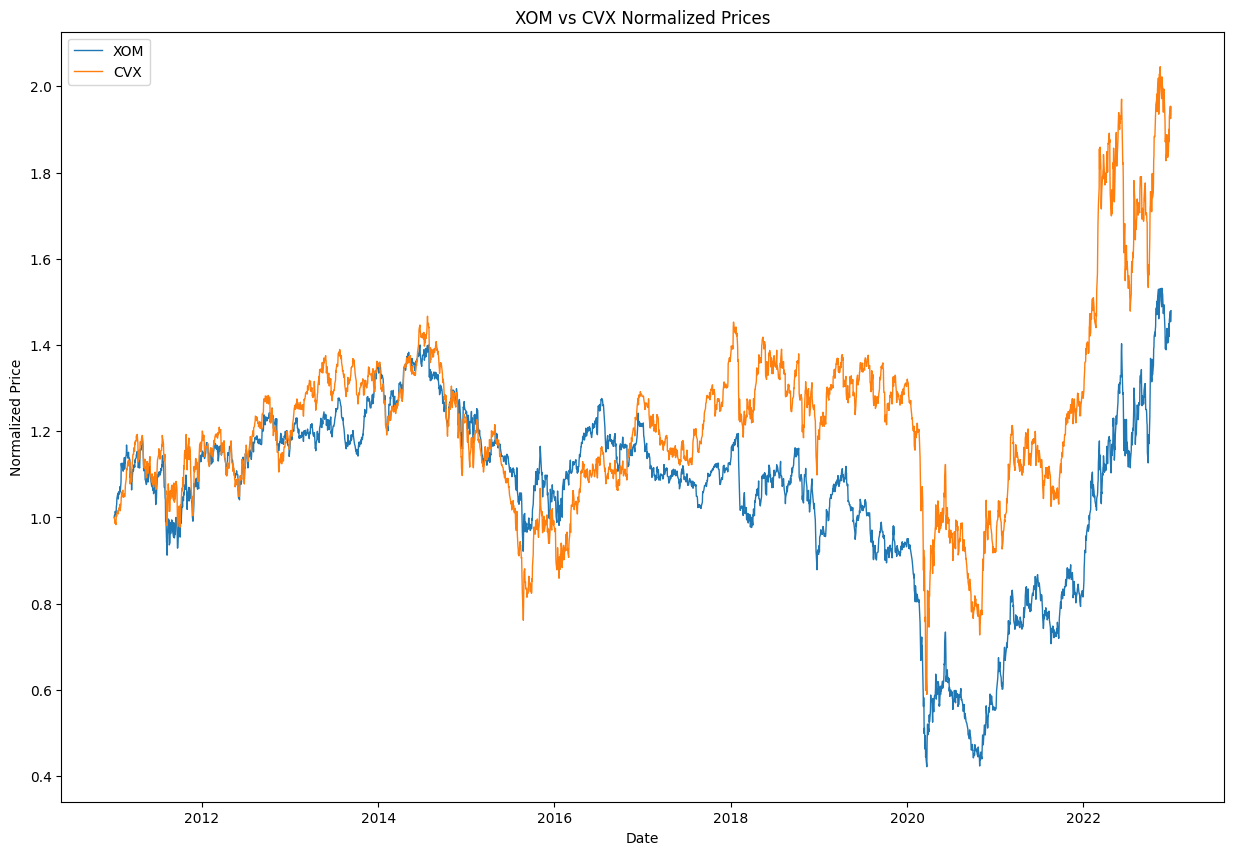

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


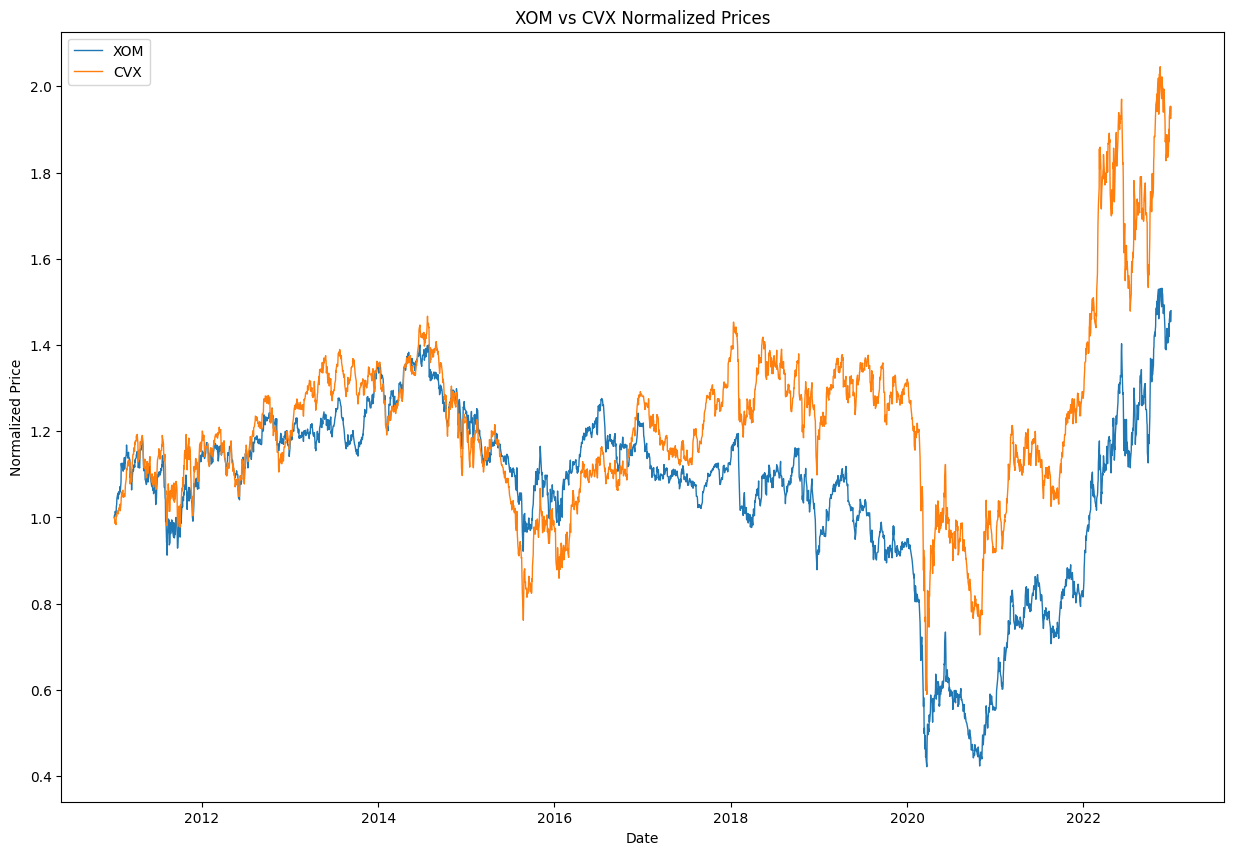

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


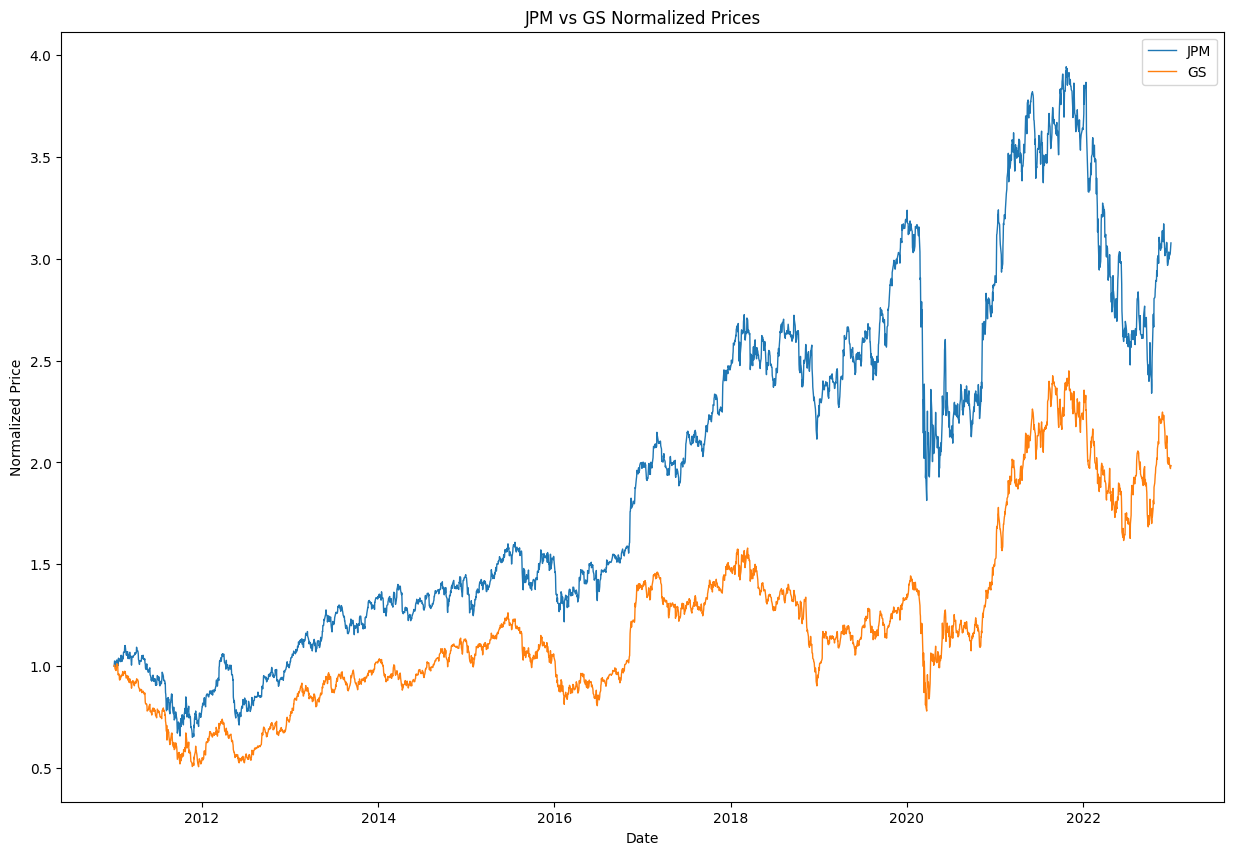

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


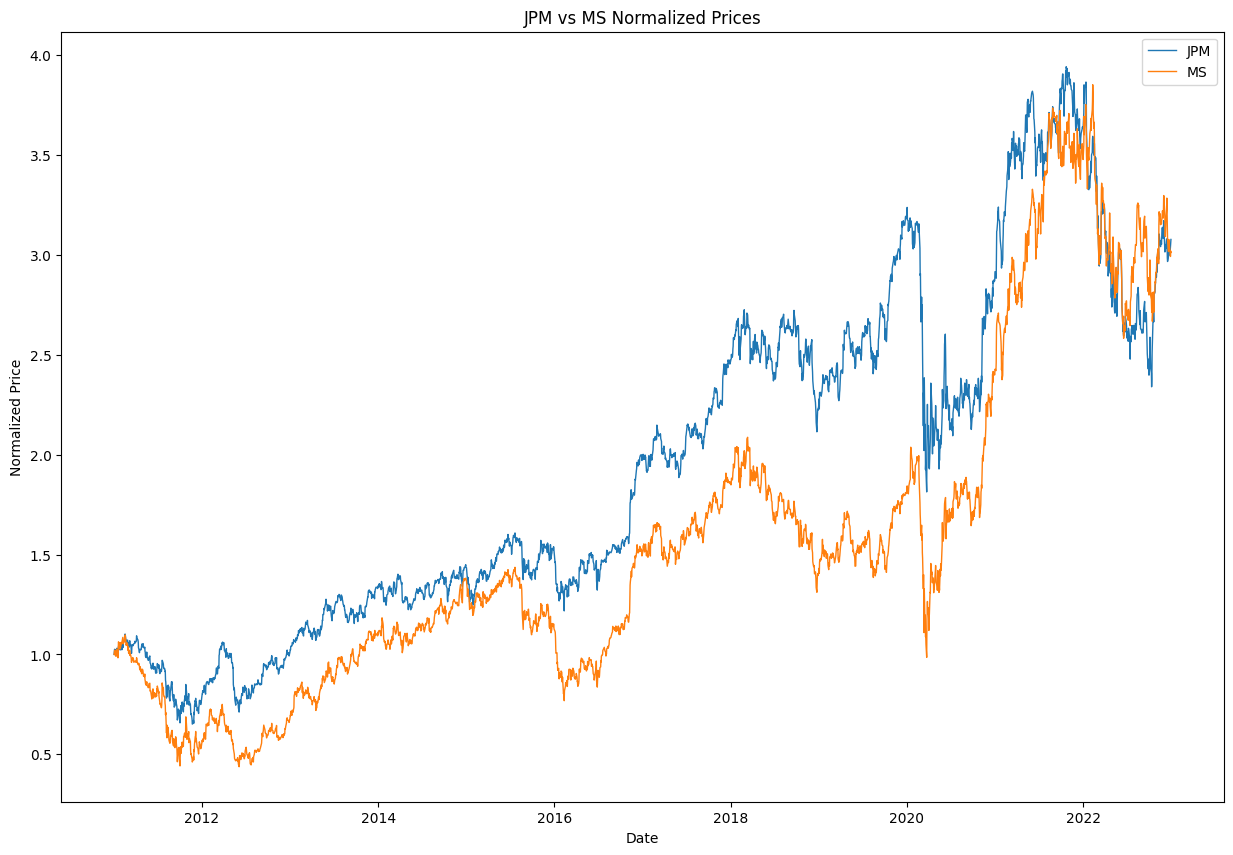

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


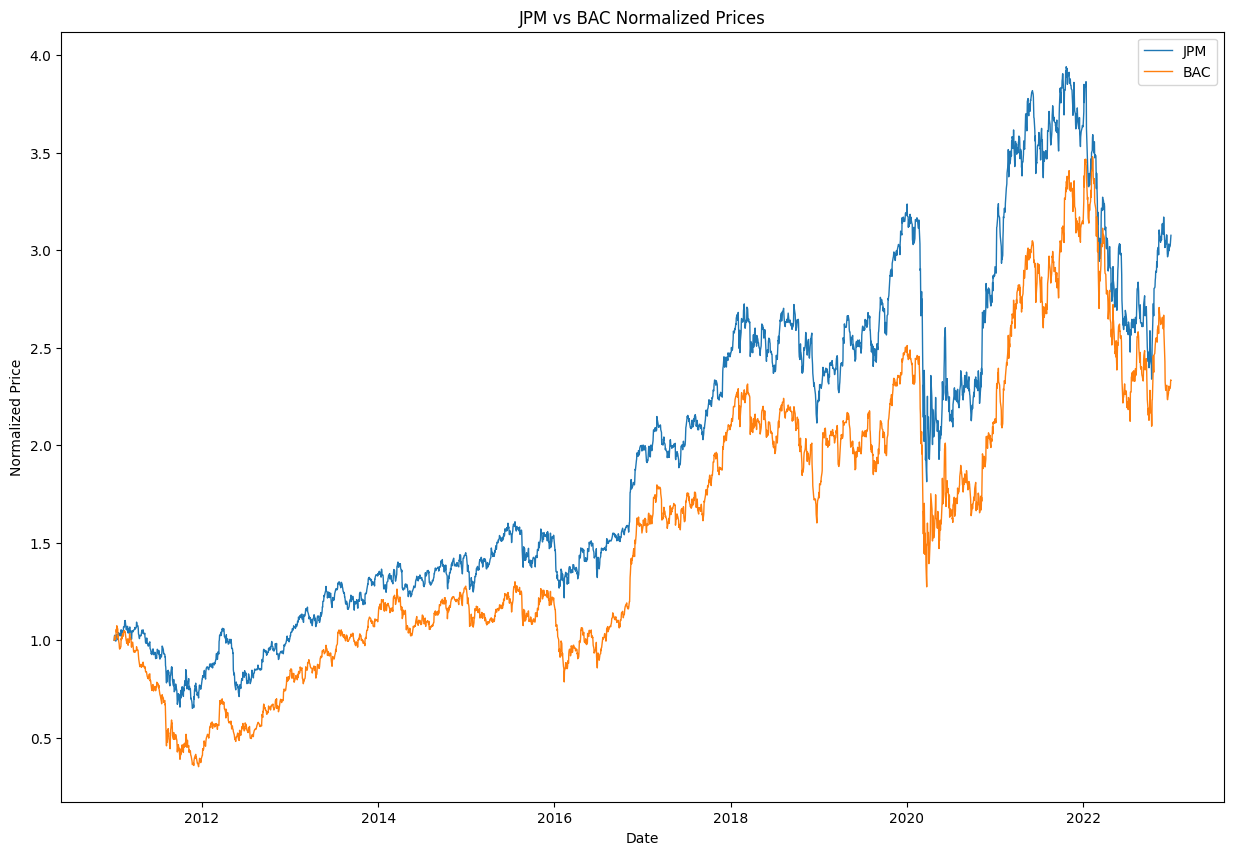

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


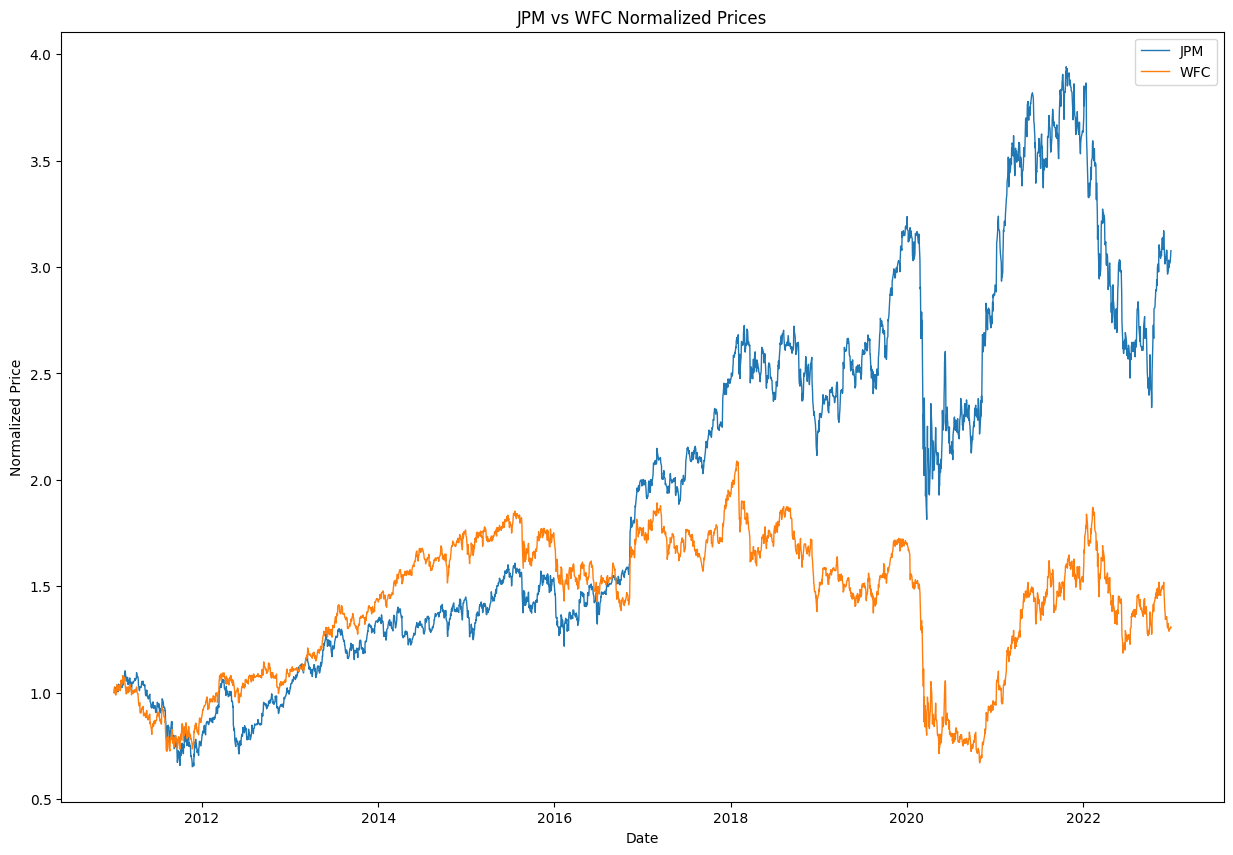

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


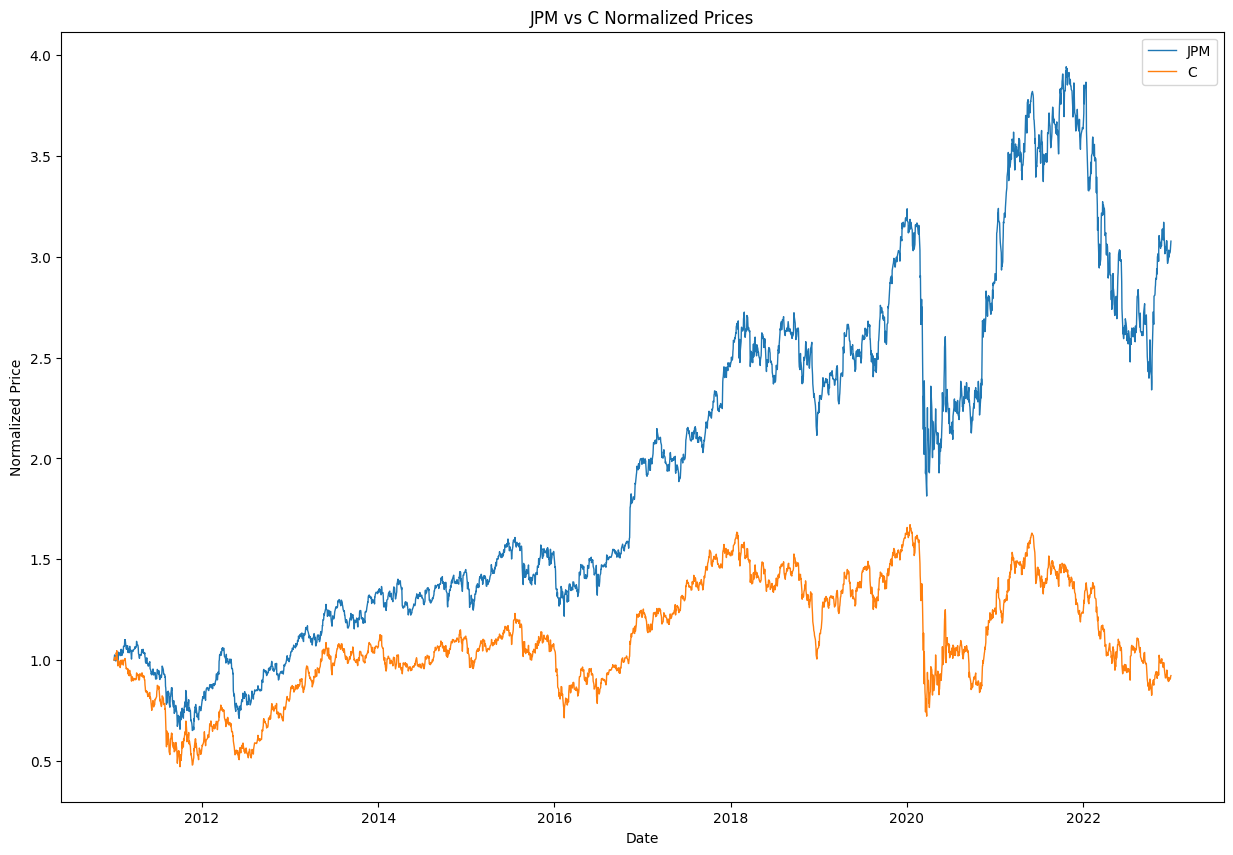

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


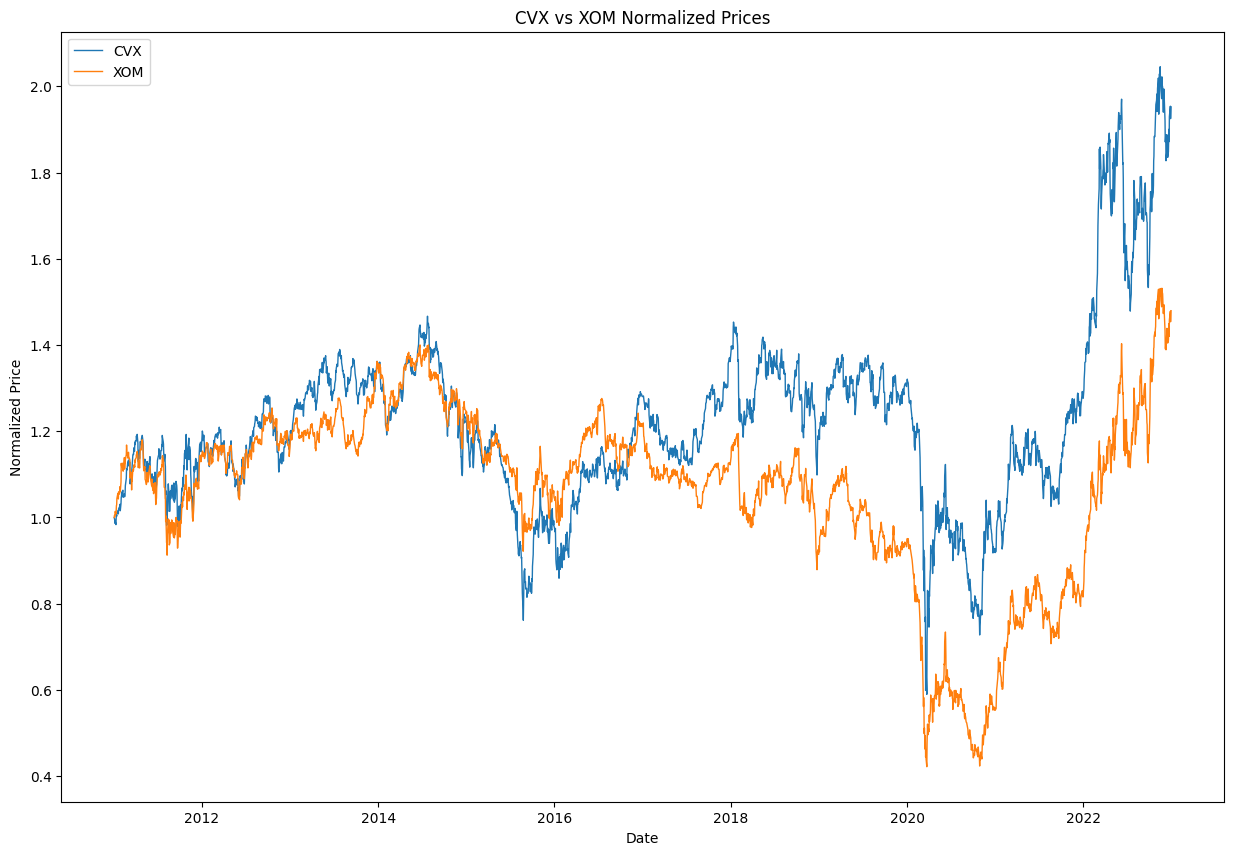

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


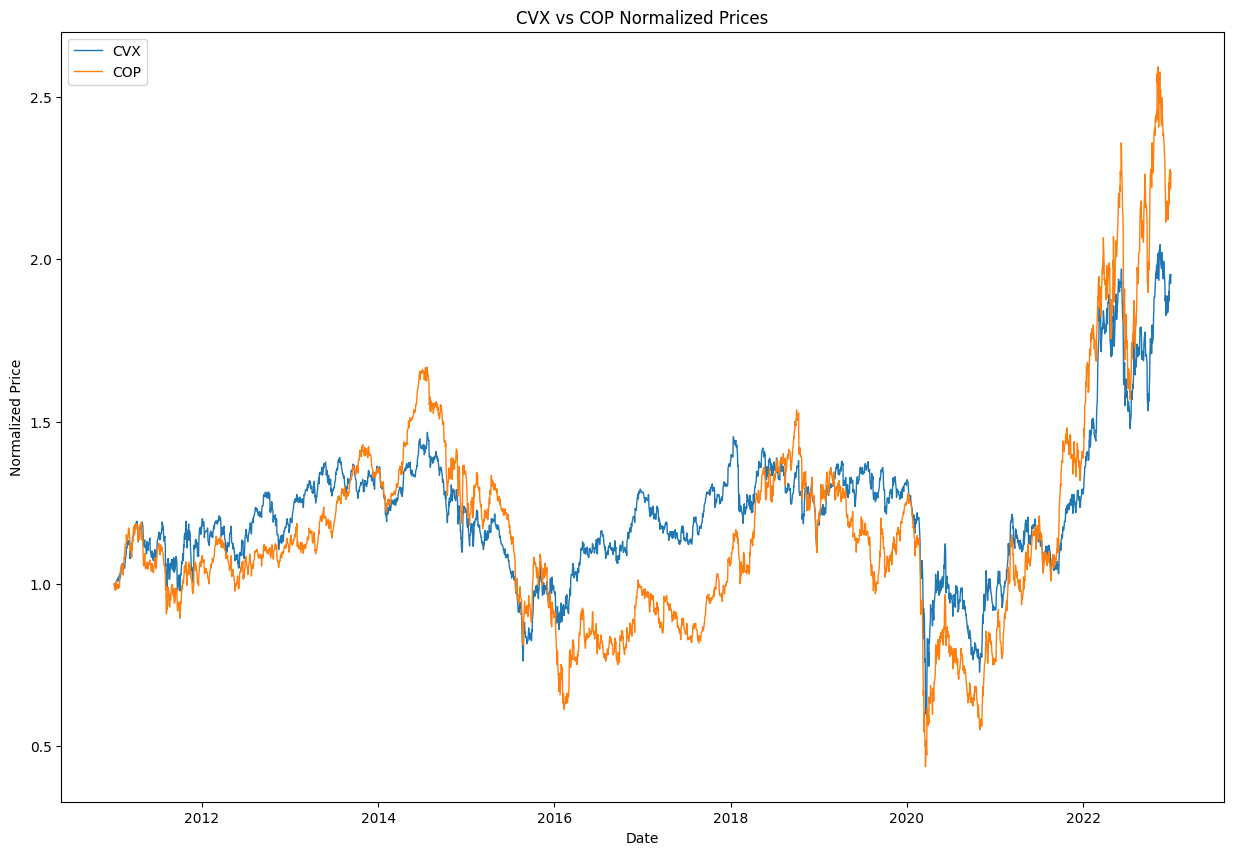

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


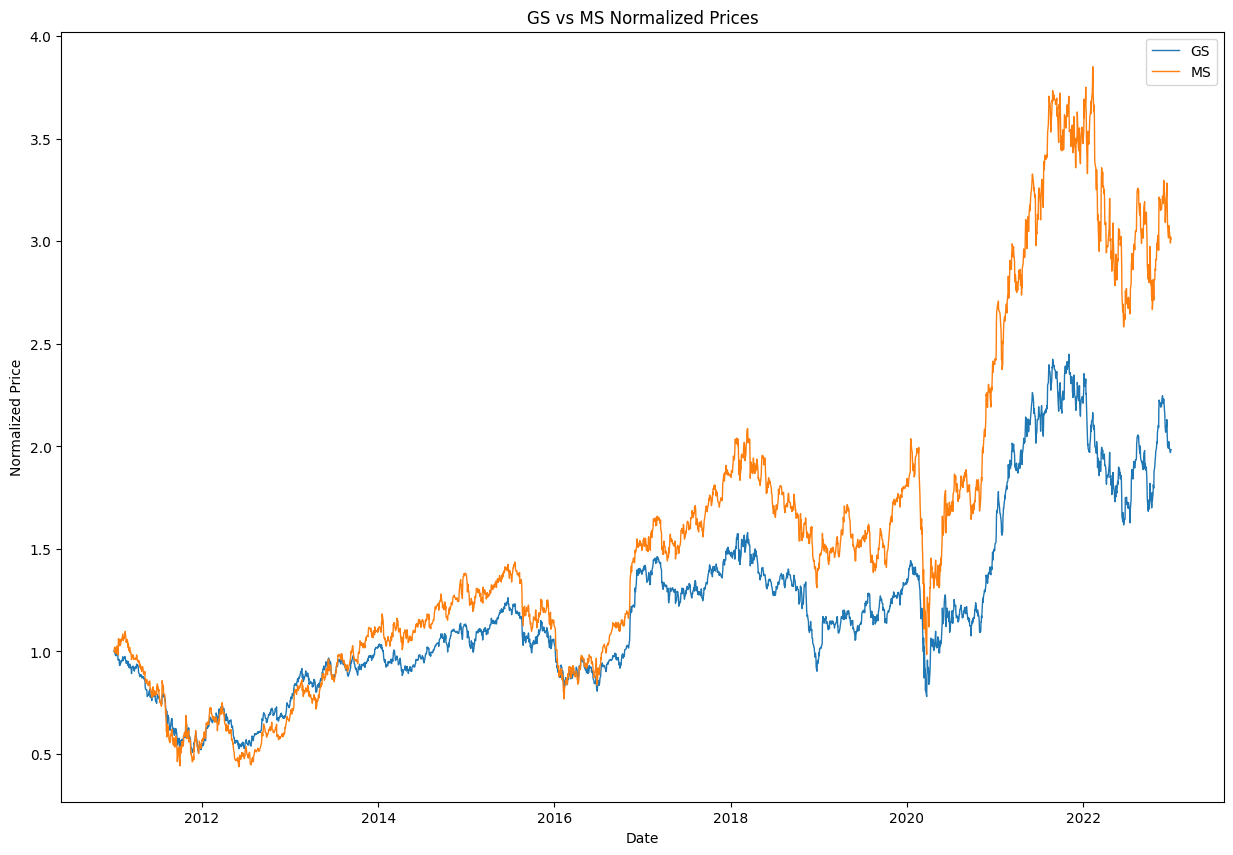

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


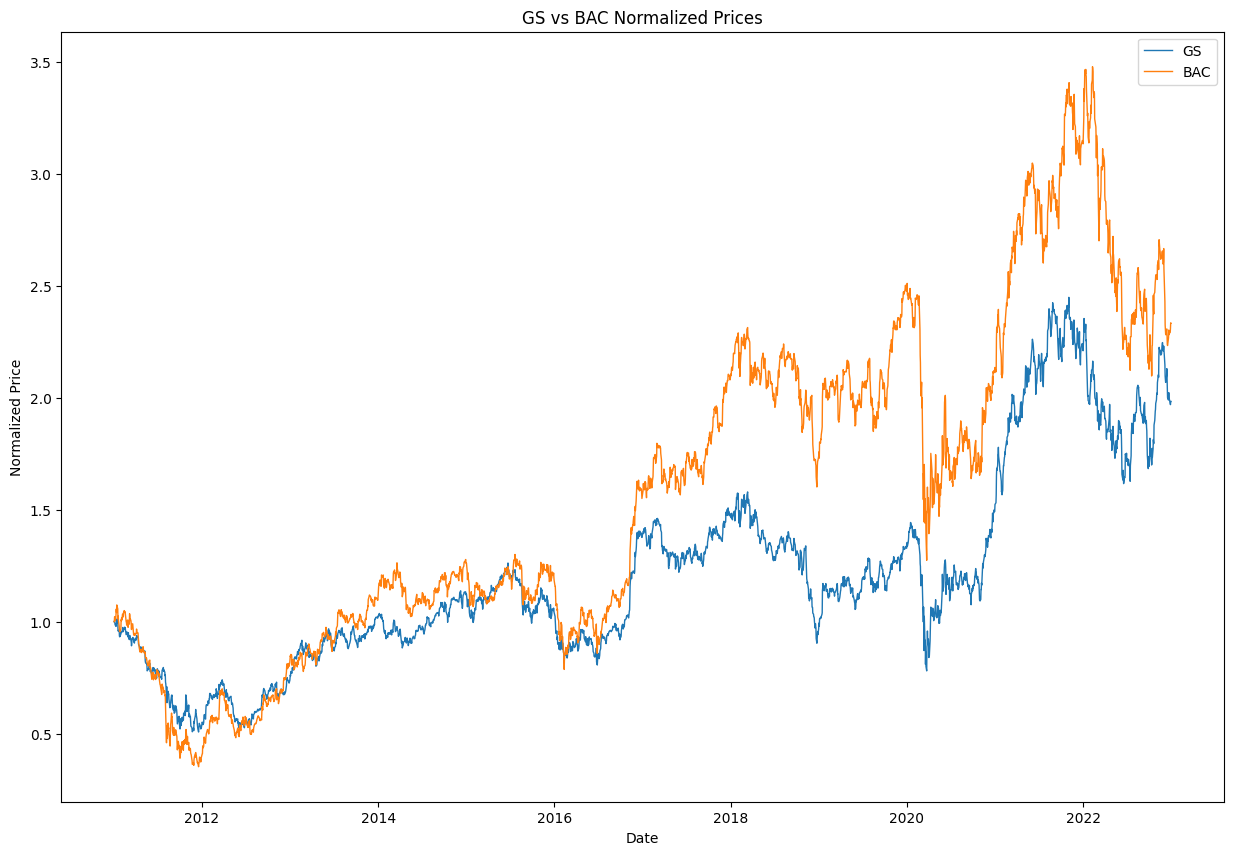

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


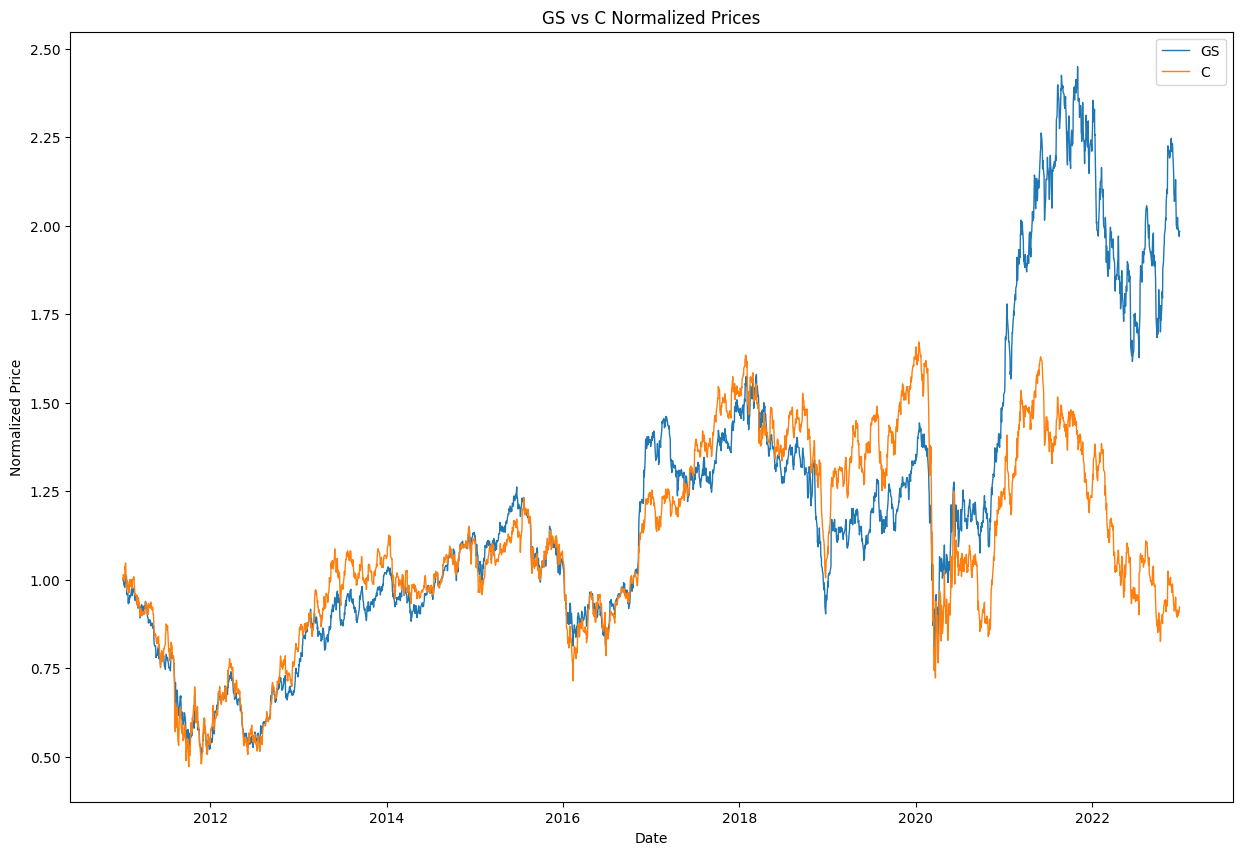

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


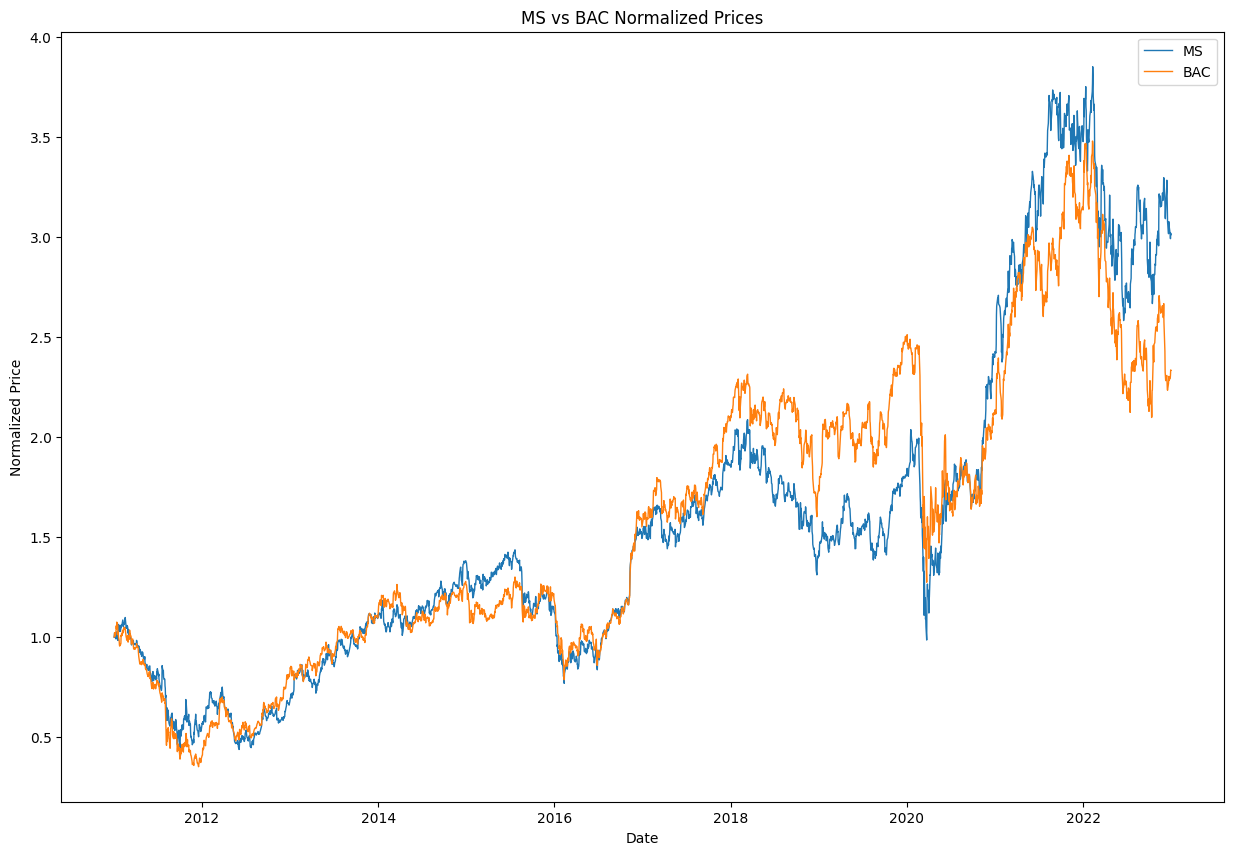

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


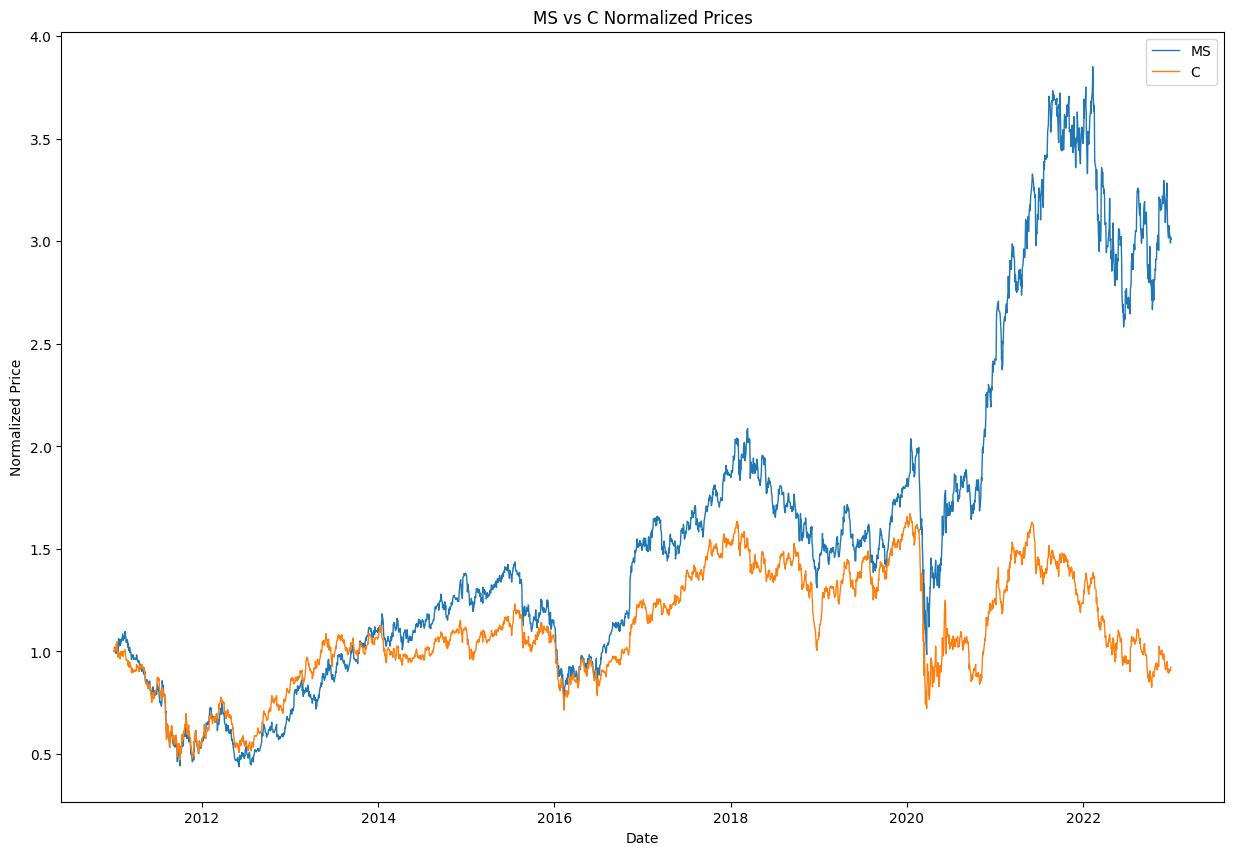

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


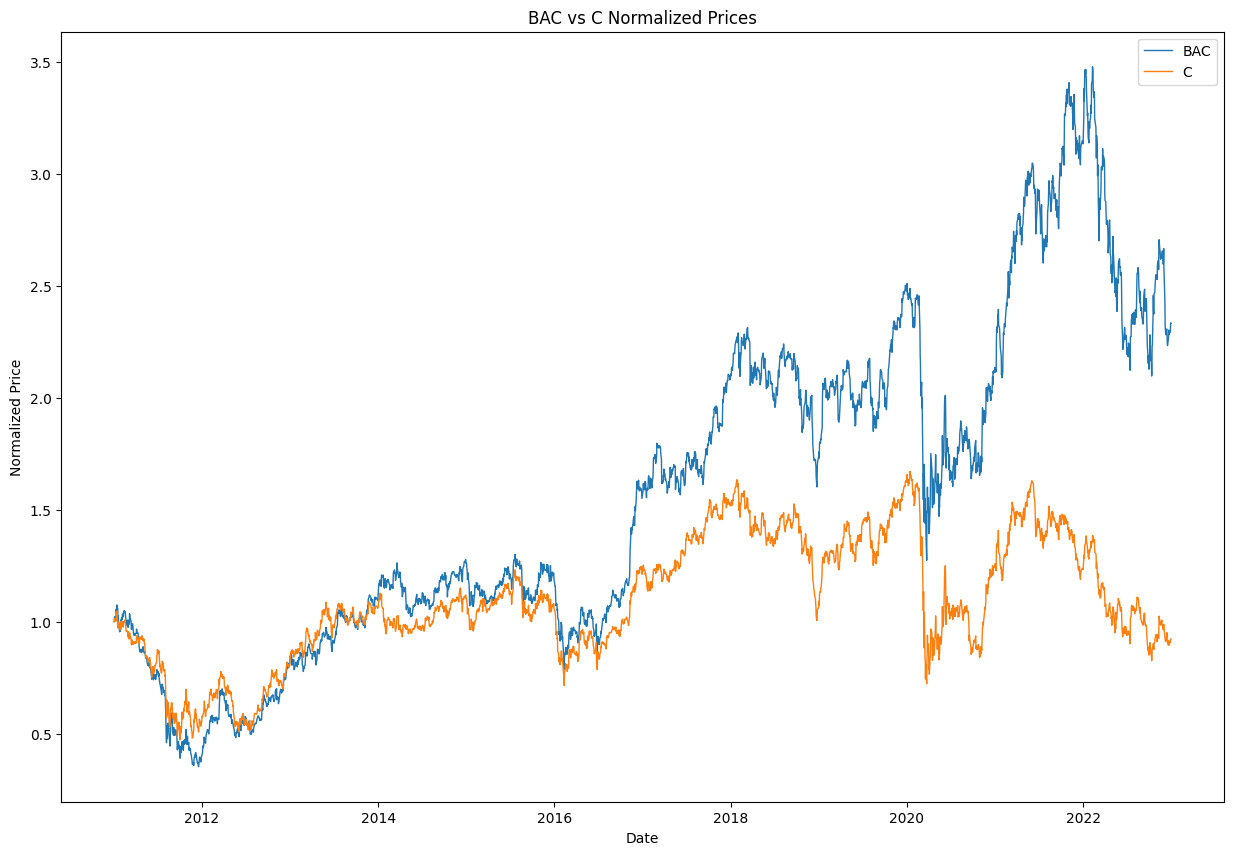

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


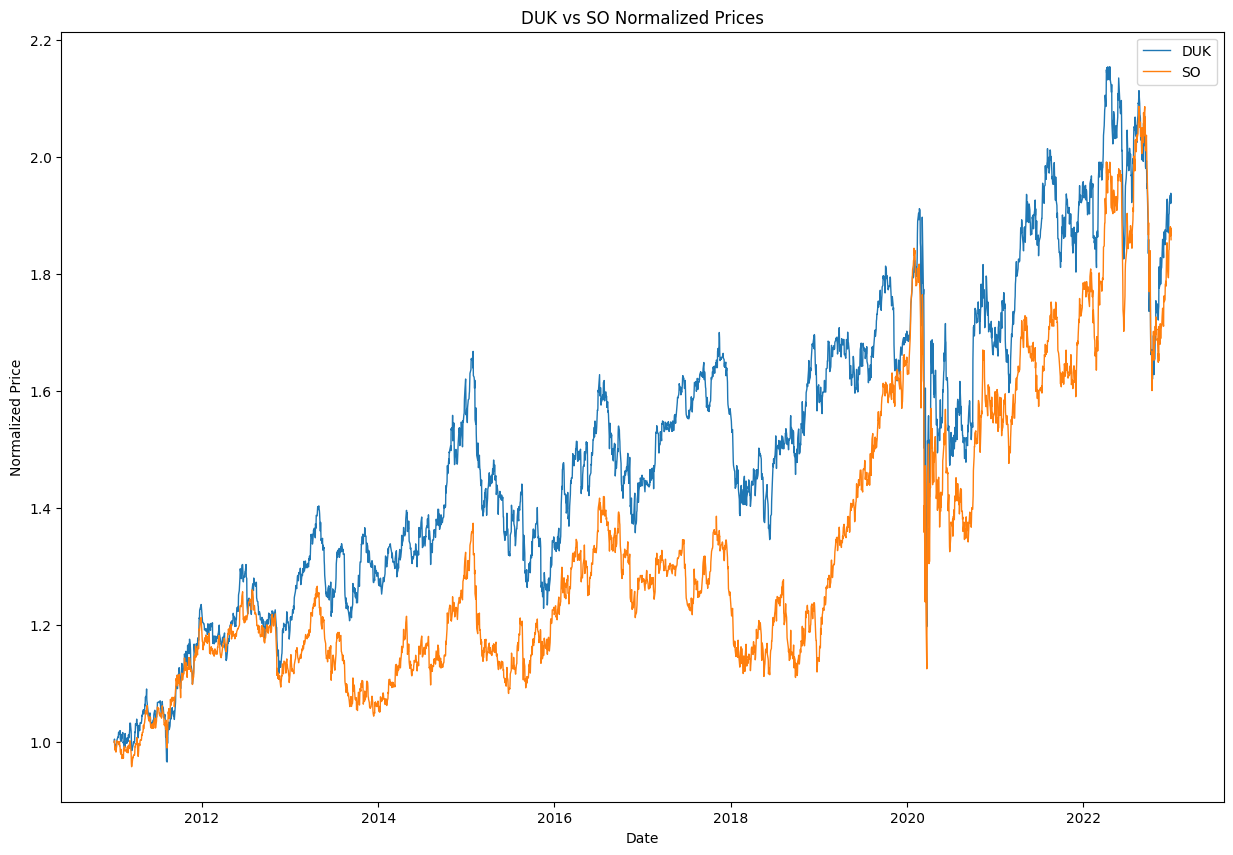

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


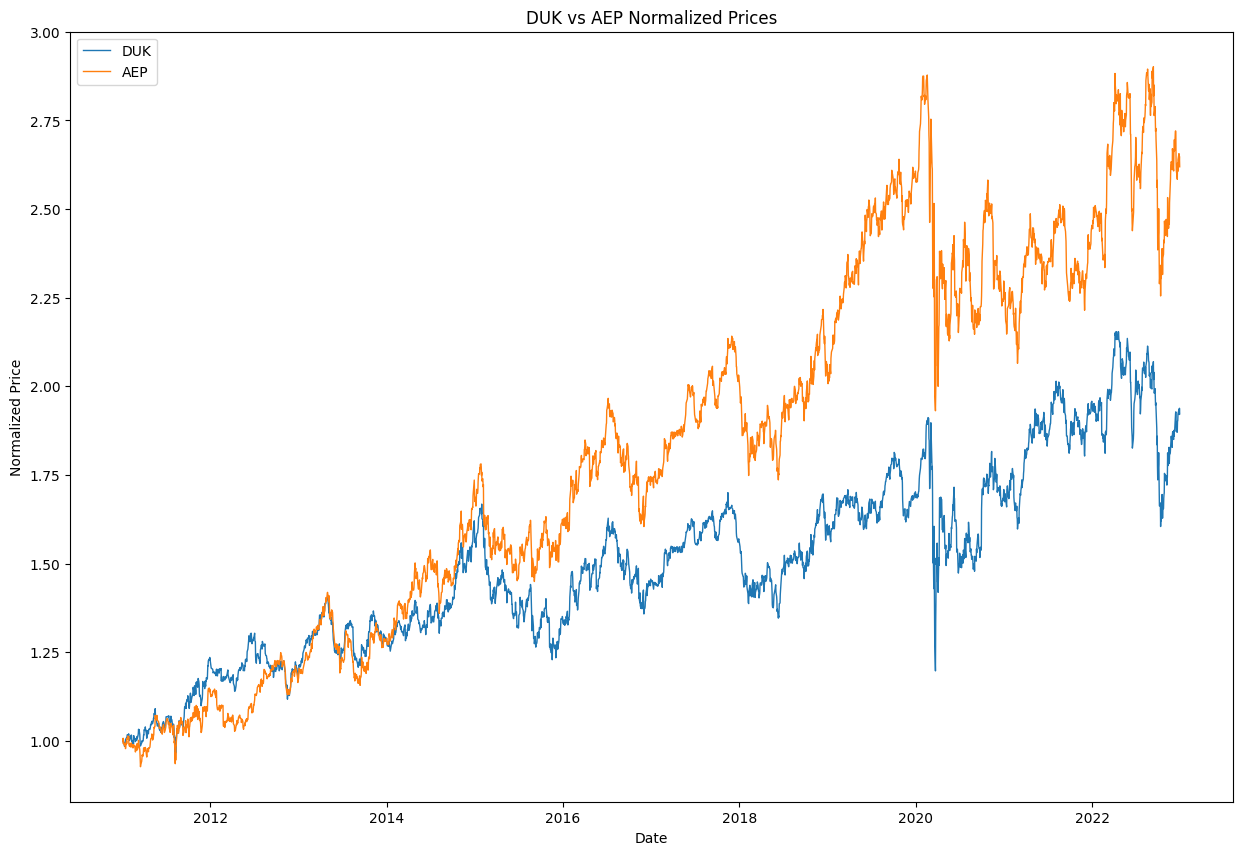

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


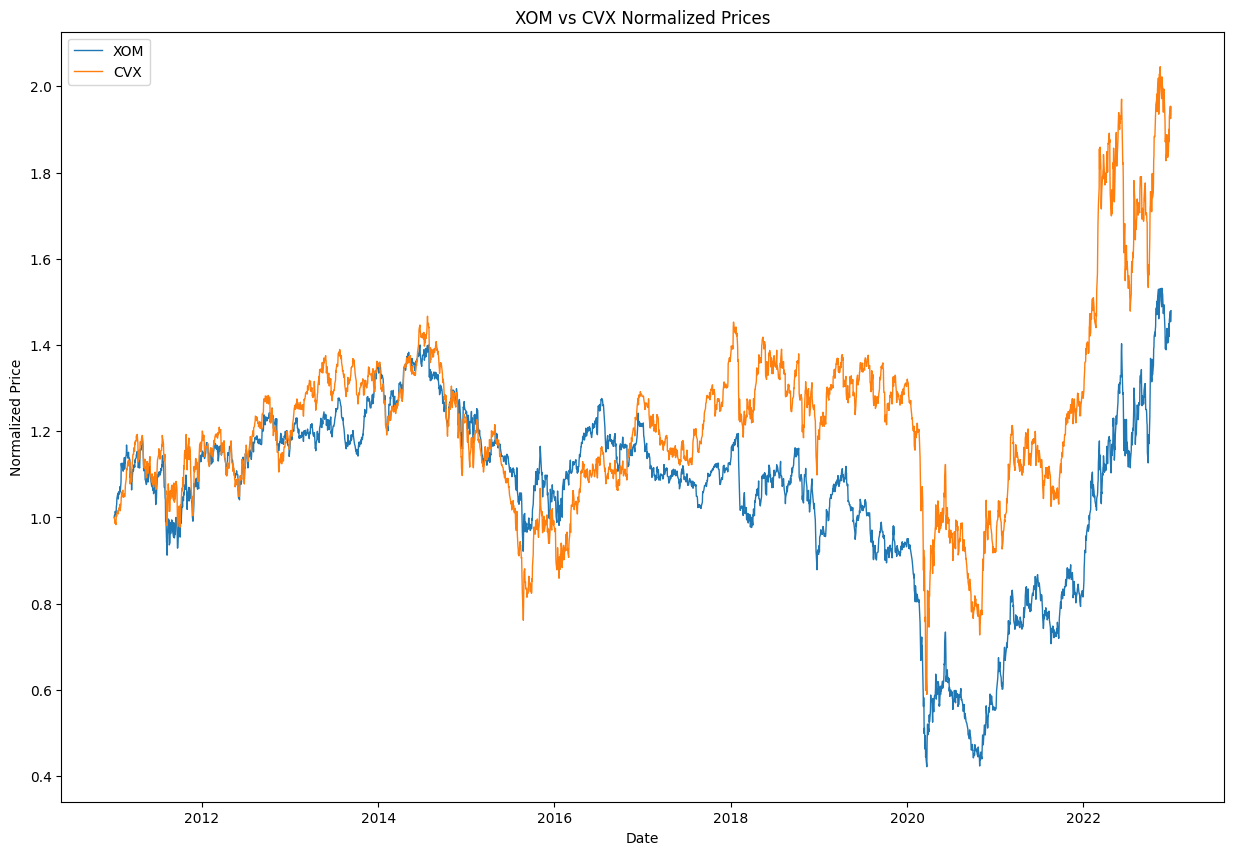

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


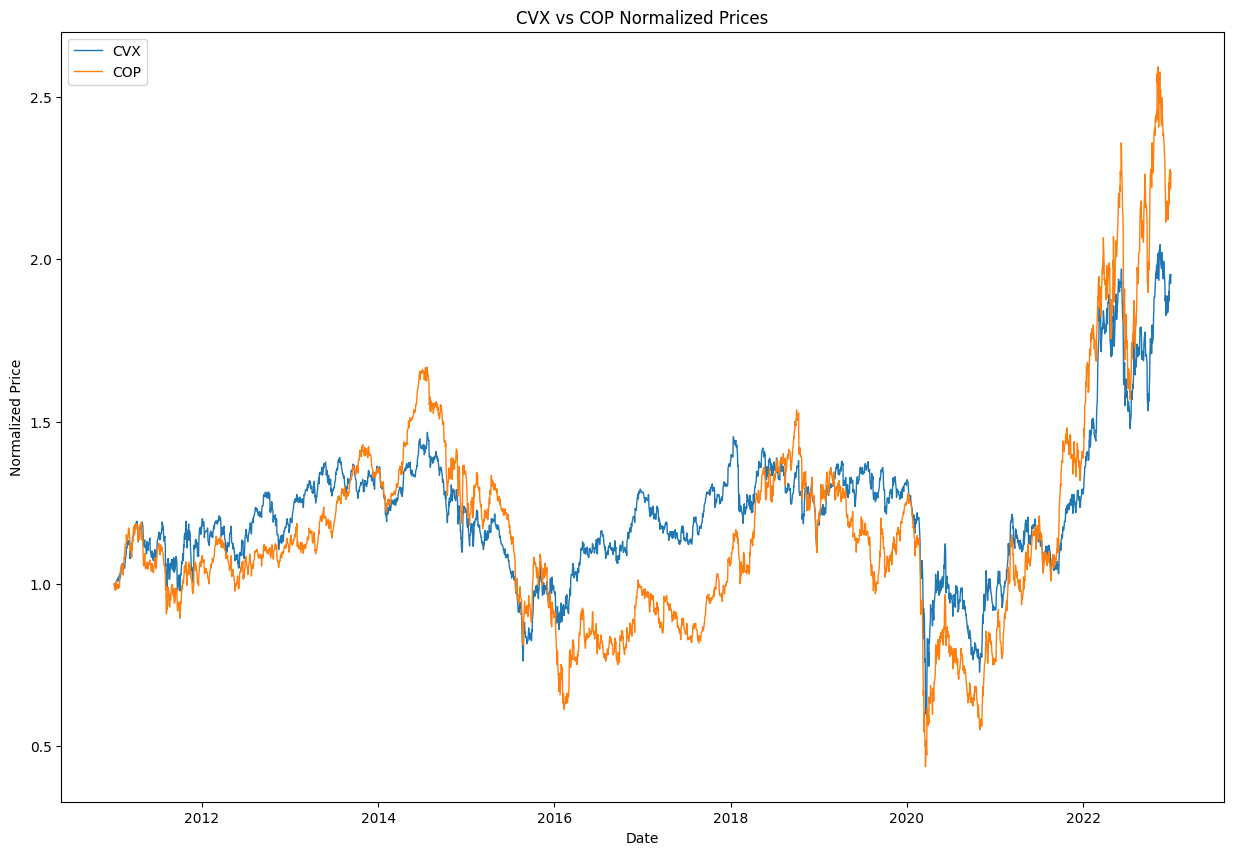

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


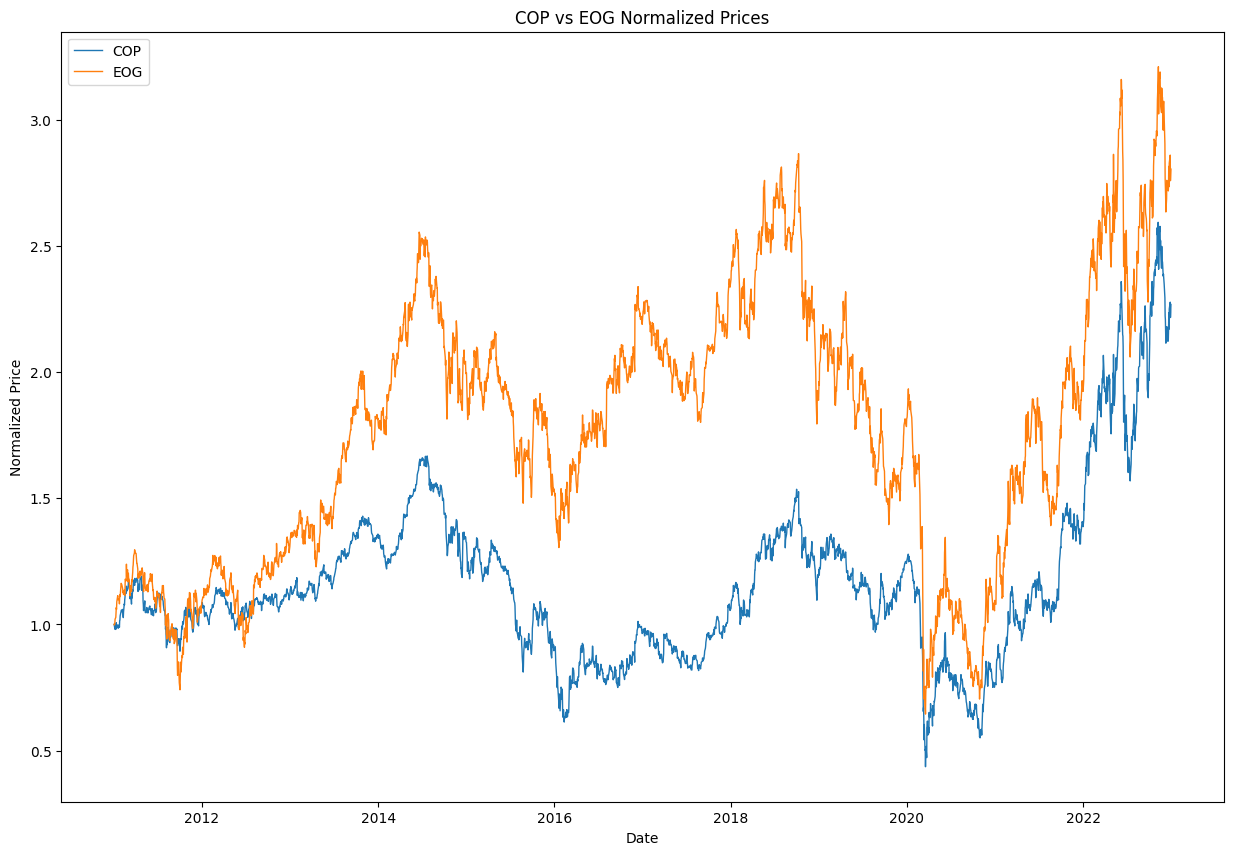

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


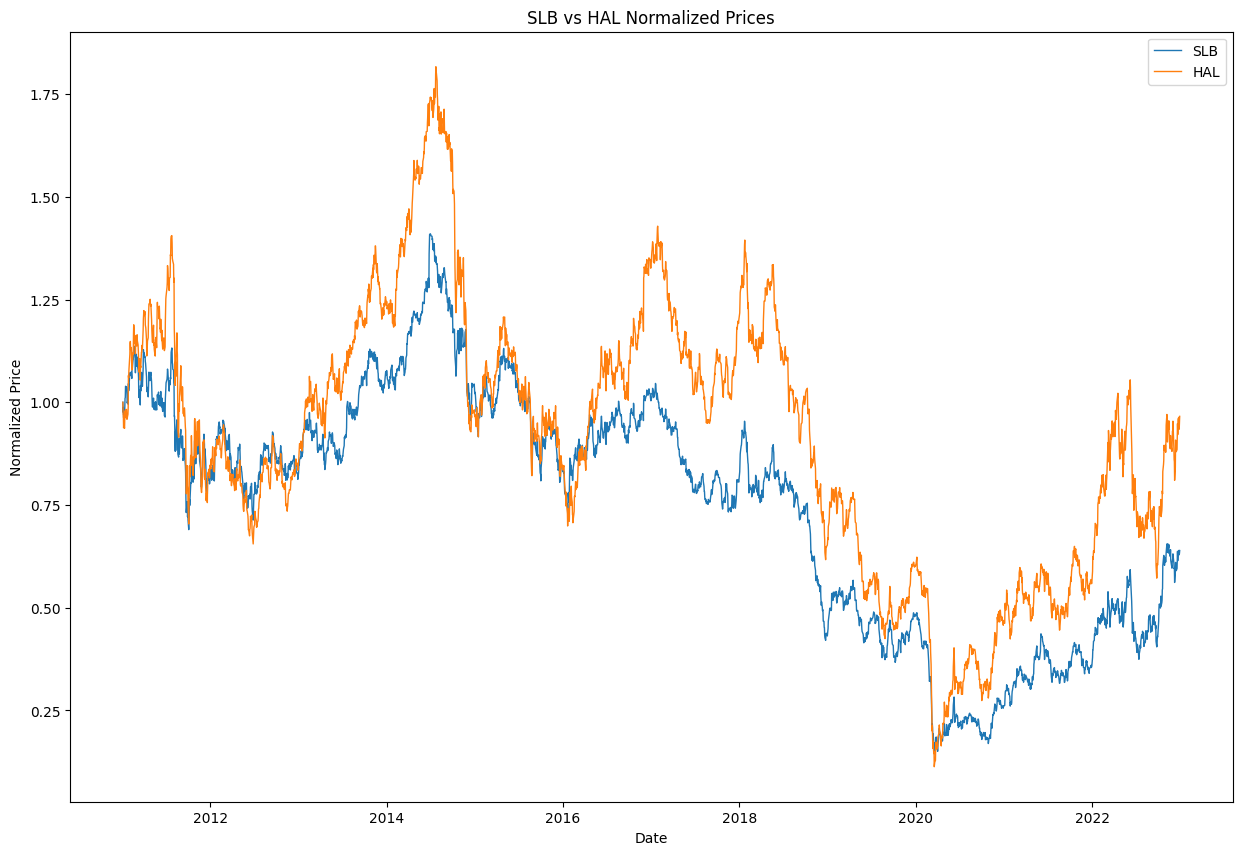

In [7]:
# Loop through each pair in the DataFrame
for index, row in All_sets_of_pairs.iterrows():
    stock1, stock2 = row['Stock1'], row['Stock2']
    
    # Download historical data
    data1 = yf.download(stock1, start=start_date, end=end_date)['Close']
    data2 = yf.download(stock2, start=start_date, end=end_date)['Close']
    
    # Normalize the data by dividing by the initial value
    data1_normalized = data1 / data1.iloc[0]
    data2_normalized = data2 / data2.iloc[0]

    # Initialize a new figure for each pair
    plt.figure(figsize=(15, 10))
    plt.plot(data1_normalized, label=f'{stock1}', linewidth=1)
    plt.plot(data2_normalized, label=f'{stock2}', linewidth=1)
    plt.title(f'{stock1} vs {stock2} Normalized Prices')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    
    # Display the plot for the current pair
    plt.show()

In [10]:
rfr = 0.03
def calculate_optimal_weights_and_returns(stock1, stock2, closing_prices, returns, test_start_date, test_end_date):

    # Calculate averages and expected returns
    average_stock_a = closing_prices[stock1].mean()
    average_stock_b = closing_prices[stock2].mean()

    X = sm.add_constant(closing_prices[stock2])  # Adding a constant for the regression
    model = sm.OLS(closing_prices[stock1], X).fit()
    
    A = 1
    B = model.params[stock2]
    r1 = returns[stock1].mean()
    r2 = returns[stock2].mean()
    std1 = returns[stock1].std()
    std2 = returns[stock2].std()
    cov12 = returns[[stock1, stock2]].cov().iloc[0, 1]
    risk_limit = 0.2
    

    # Optimization problem setup
    w1 = cp.Variable()
    w2 = cp.Variable()
    abs_w1 = cp.Variable()
    abs_w2 = cp.Variable()

    objective = cp.Maximize(r1 * w1 + r2 * w2)
    portfolio_variance = cp.quad_form(cp.vstack([w1, w2]), np.array([[std1**2, cov12], [cov12, std2**2]]))
    risk_constraint = portfolio_variance <= risk_limit**2

    # Update the constraints in your optimization setup
    constraints = [A * w1 + B * w2 == 0, abs_w1 + abs_w2 == 1, abs_w1 >= cp.abs(w1), abs_w2 >= cp.abs(w2), risk_constraint]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Check for problem status
    if problem.status in ["infeasible", "unbounded"]:
        return {"status": problem.status, "optimal_weights": None, "total_return": None, "initial_investment": None, "gain": None}

    # Fetch test period stock prices
    test_stock_data = yf.download([stock1, stock2], start=test_start_date, end=test_end_date)['Adj Close']

    # Calculate investments and portfolio value
    investment_1 = w1.value * 100
    investment_2 = w2.value * 100
    value_1 = test_stock_data[stock1] / test_stock_data[stock1].iloc[0] * investment_1
    value_2 = test_stock_data[stock2] / test_stock_data[stock2].iloc[0] * investment_2
    total_portfolio_value = value_1 + value_2

    # Calculate total return, initial investment, and gain
    initial_total_investment = investment_1 + investment_2
    final_total_value = total_portfolio_value.iloc[-1]
    gain = final_total_value - initial_total_investment
    total_return = (gain / abs(initial_total_investment))
    
    portfolio_variance = (w1.value * std1) ** 2 + (w2.value * std2) ** 2 + 2 * w1.value * w2.value * cov12
    portfolio_volatility = portfolio_variance ** 0.5
    sharpe = (total_return-rfr)/portfolio_variance
    
    # Plotting
    plt.figure(figsize=(10, 6))
    total_portfolio_value.plot(title=f"Total Portfolio Value for {stock1} and {stock2}")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.grid(True)
    plt.show()
    

    return {
        "status": "success",
        "optimal_weights": (w1.value, w2.value),
        "total_return": total_return,
        "initial_investment": initial_total_investment,
        "final_investment_value":final_total_value,
        "gain": gain,
        "Sharpe": sharpe,
        "Portfolio Standard Deviation": portfolio_volatility
    }


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


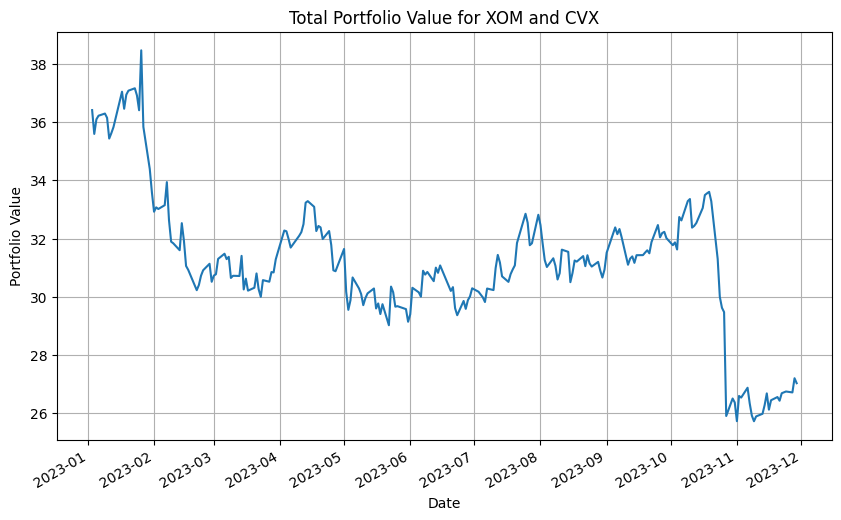

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


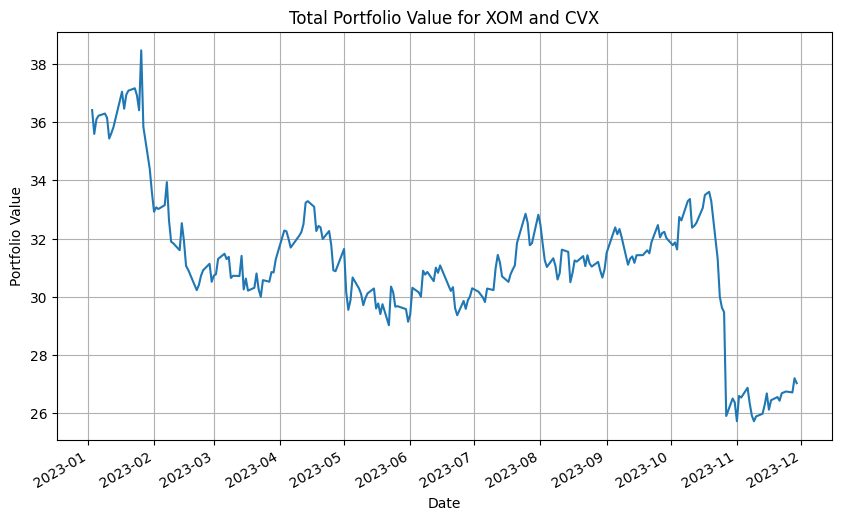

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


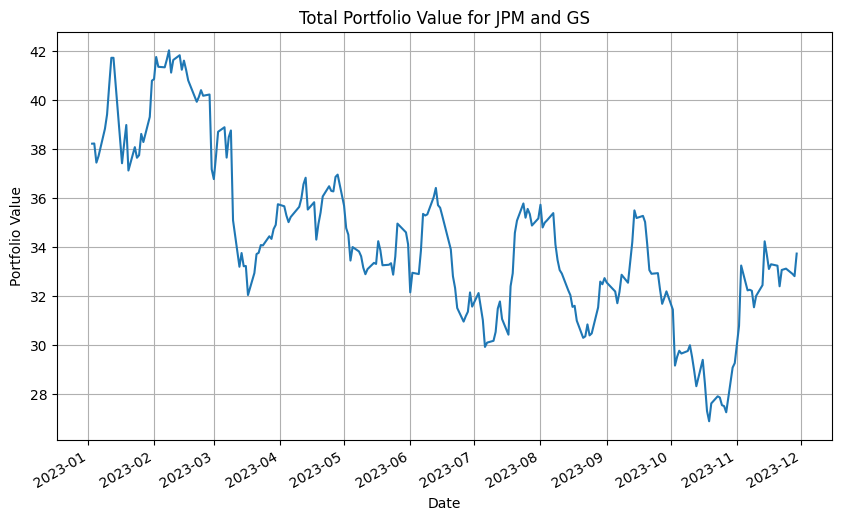

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


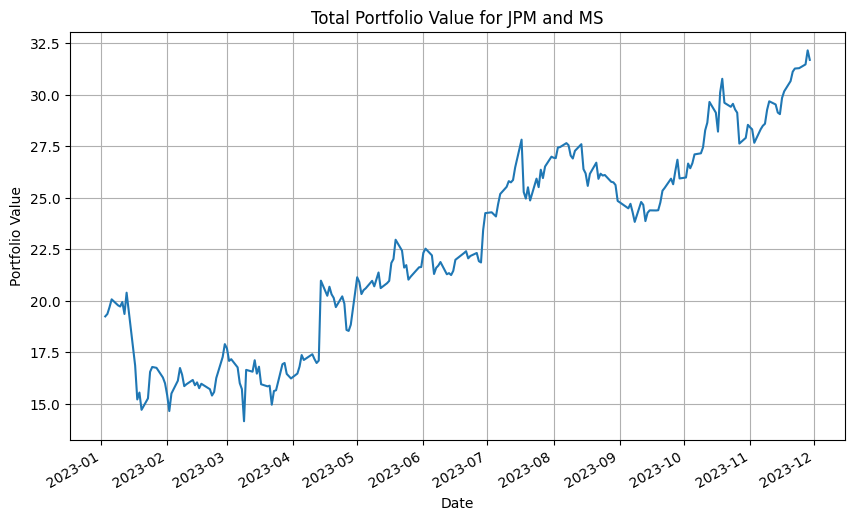

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


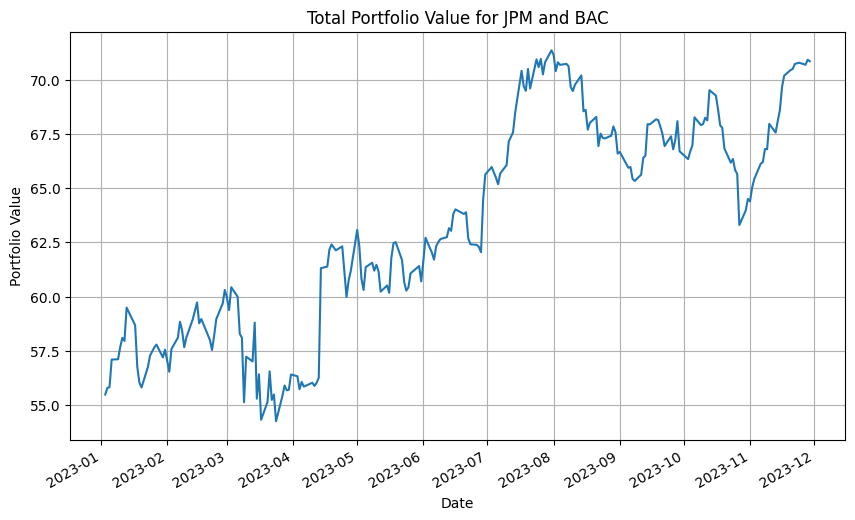

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


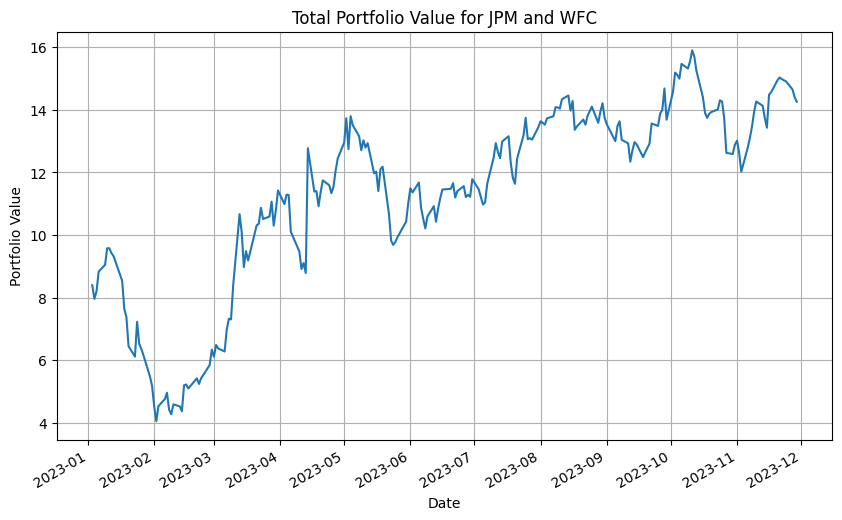

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


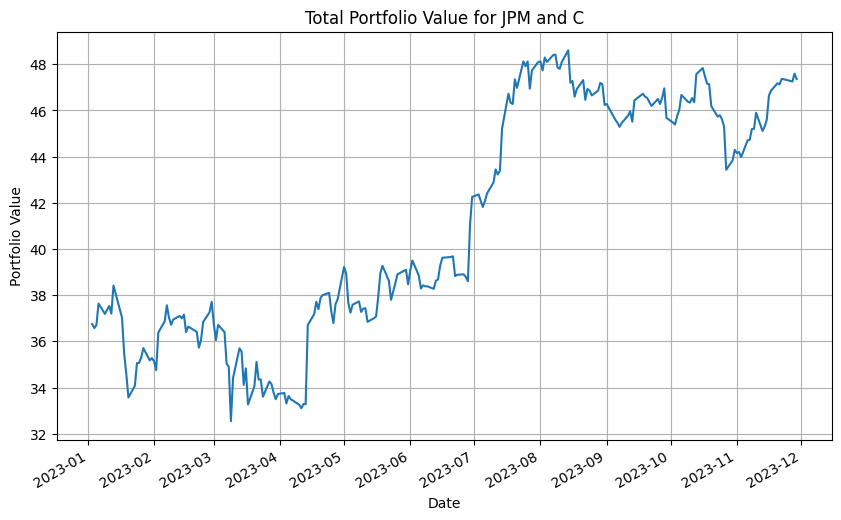

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


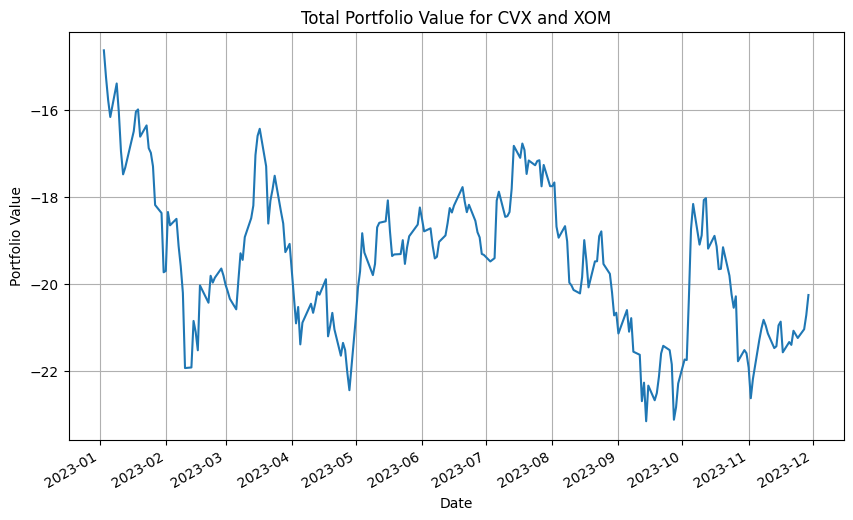

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


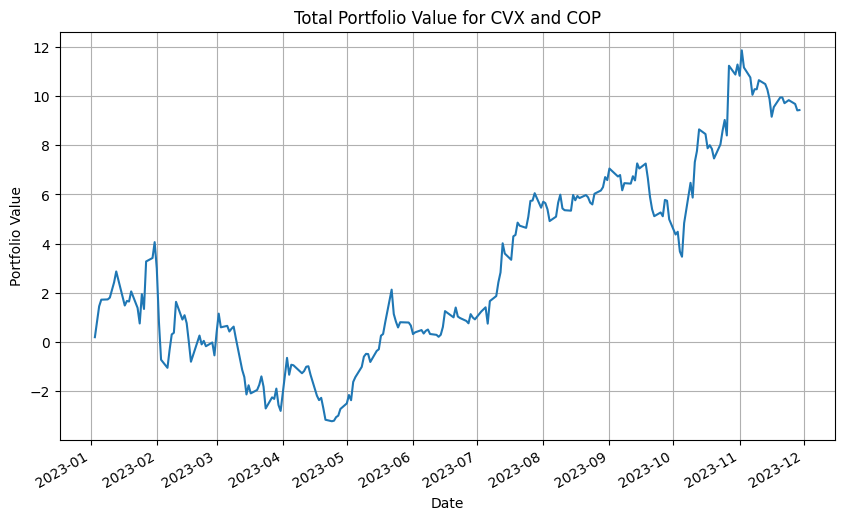

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


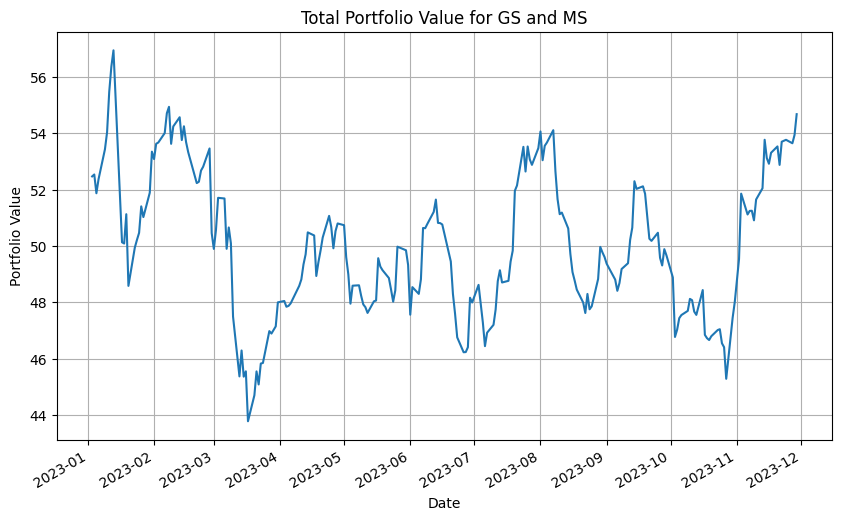

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


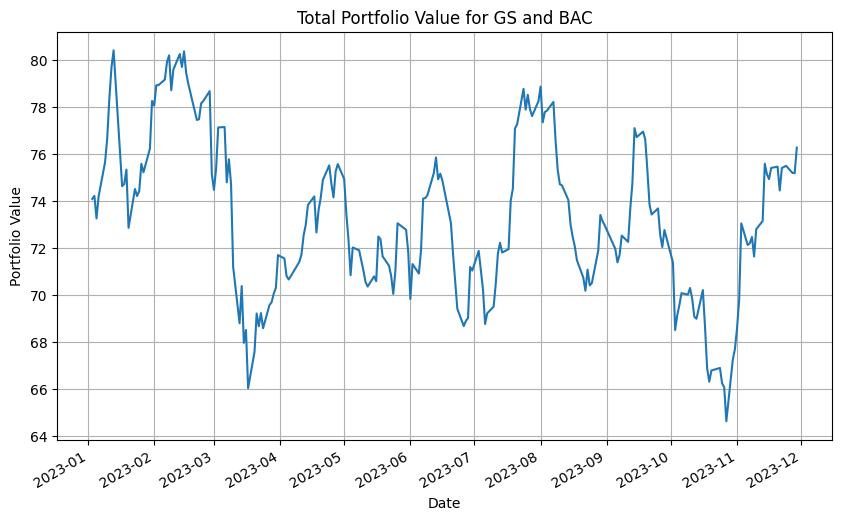

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


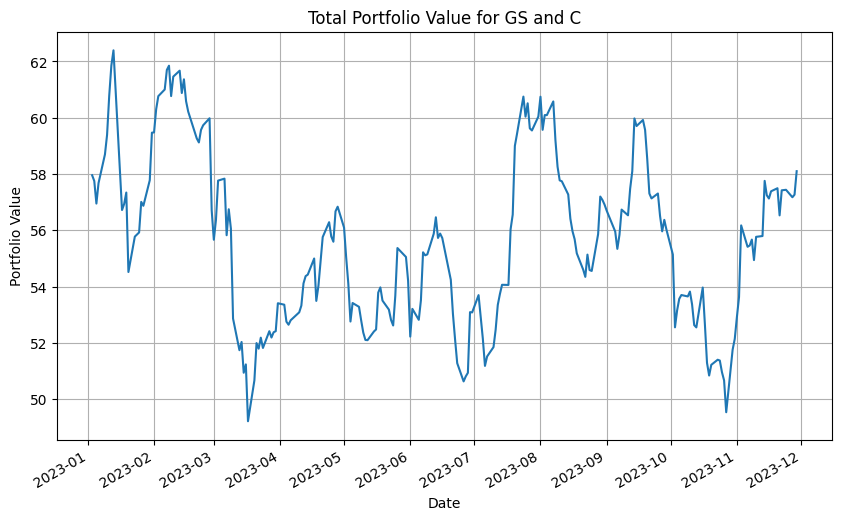

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


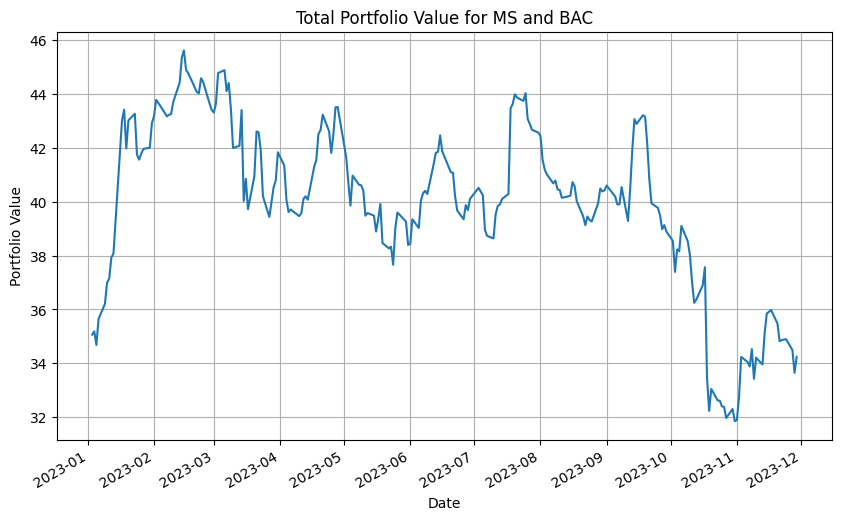

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


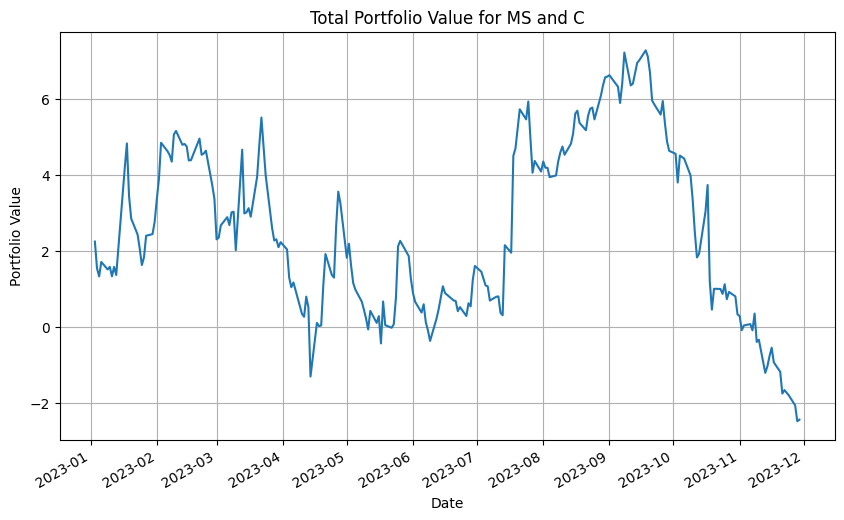

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


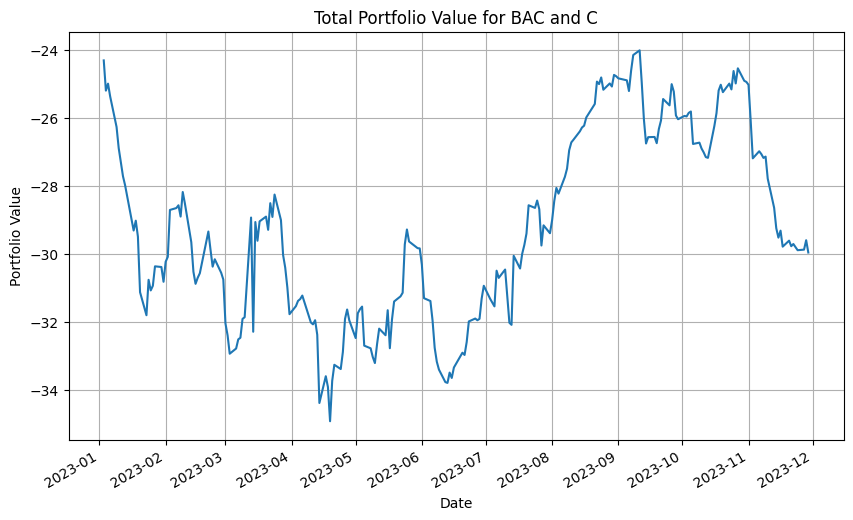

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


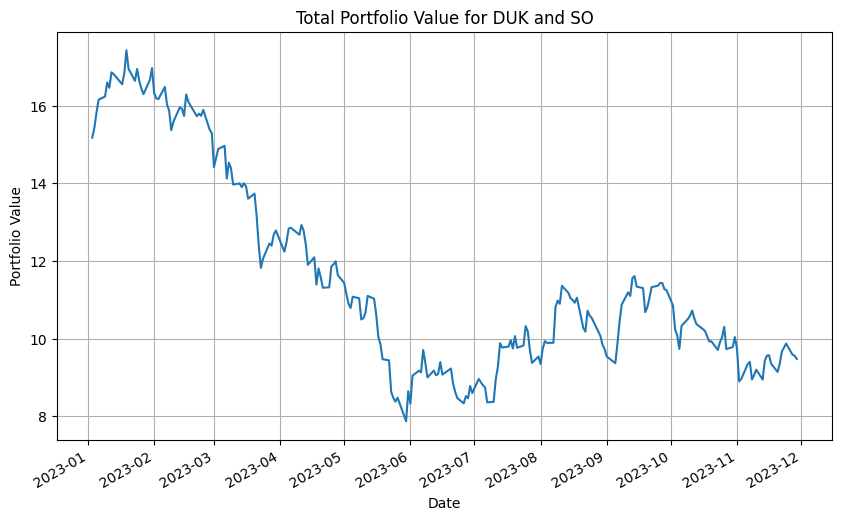

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


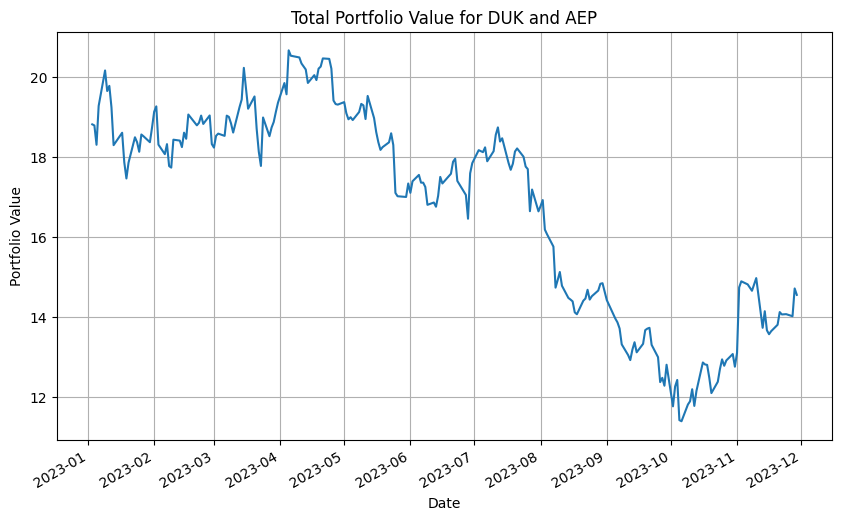

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


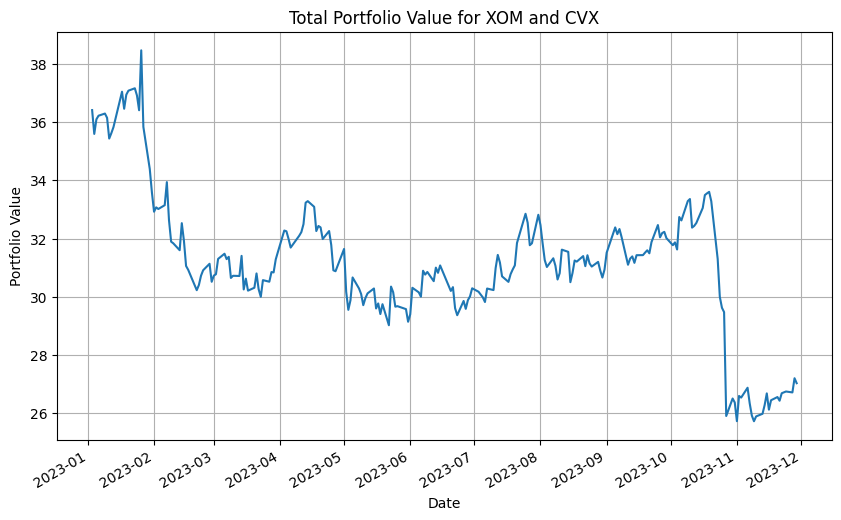

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


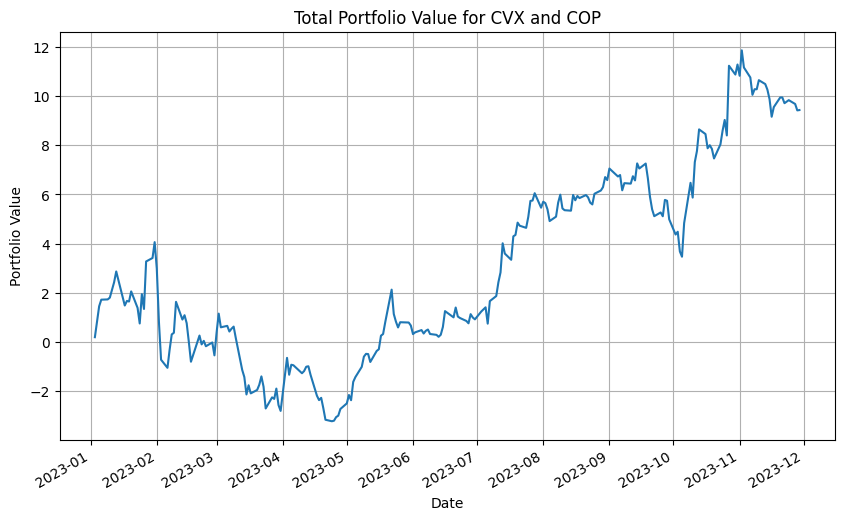

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


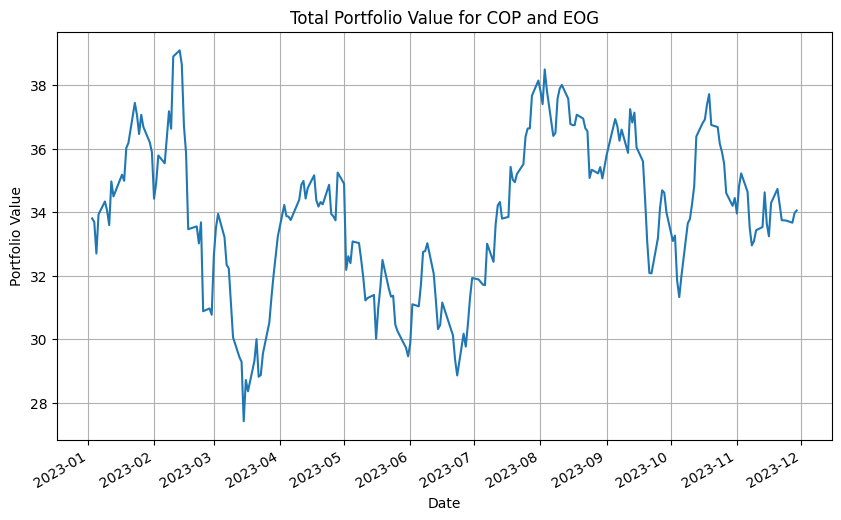

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


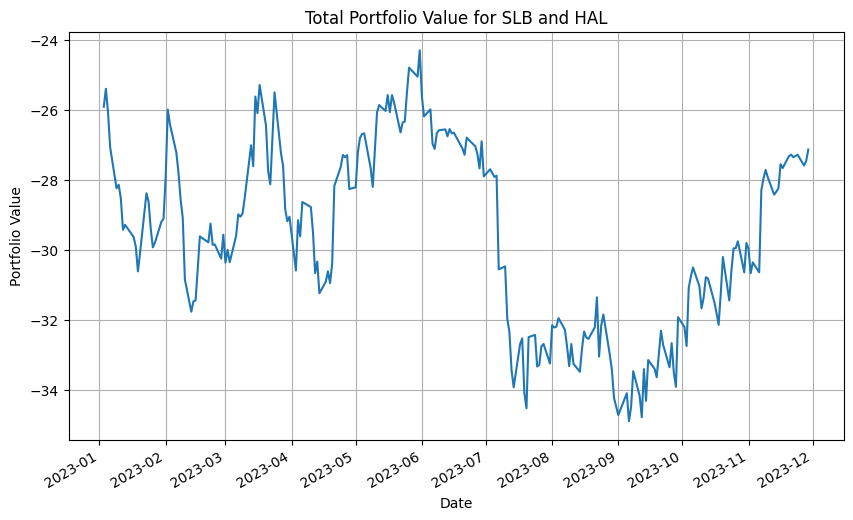

In [11]:
results = []
total_initial_investment = 0
total_final_investment_value = 0

for index, row in All_sets_of_pairs.iterrows():
    pair_result = calculate_optimal_weights_and_returns(row['Stock1'], row['Stock2'], closing_prices, returns, '2023-01-01', '2023-11-30')
    results.append(pair_result)

    # Sum the initial and final investment values if the result is successful
    if pair_result['status'] == 'success':
        total_initial_investment += pair_result['initial_investment']
        total_final_investment_value += pair_result['final_investment_value']

total_return = ((total_final_investment_value / total_initial_investment) - 1) * 100


In [12]:
print(total_return)

1.4113719374596378


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

def download_data(stock, start_date, end_date):
    data = yf.download(stock, start=start_date, end=end_date)
    close_prices = data['Close']
    normalized_data = (close_prices - close_prices.mean()) / close_prices.std()
    return normalized_data

def calculate_ou_parameters(spread, delta_t=1):
    if len(spread) < L:
        return np.nan, np.nan, np.nan  # Not enough data
    n = len(spread) - 1  # Number of observations for the regression
    
    delta_spread = np.diff(spread)
    X_x = np.sum(spread[:-1])
    X_y = np.sum(spread[1:])  # Use spread[1:] instead of delta_spread
    X_xx = np.sum(spread[:-1] ** 2)
    X_xy = np.sum(spread[:-1] * spread[1:])  # Use spread[1:] instead of delta_spread
    X_yy = np.sum(spread[1:] ** 2)  # Use spread[1:] instead of delta_spread

    # Calculation of theta_star
    theta_star_numerator = n * X_xy - X_x * X_y
    theta_star_denominator = n * X_xx - X_x ** 2
    if theta_star_denominator <= 0:
        return np.nan, np.nan, np.nan  # Invalid result, return NaNs

    theta_star = theta_star_numerator / theta_star_denominator

    # Calculation of mu_star
    mu_star_numerator = X_xy - theta_star * (X_x + X_y) + n * (theta_star ** 2)
    mu_star_denominator = X_xx - 2 * theta_star * X_x + n * (theta_star ** 2)
    if mu_star_denominator <= 0 or mu_star_numerator <= 0:
        return np.nan, np.nan, np.nan  # Invalid result, return NaNs

    mu_star = -np.log(mu_star_numerator / mu_star_denominator) / delta_t

    # Calculation of sigma_star squared
    sigma_star_squared_numerator = X_yy - 2 * theta_star * X_xy + theta_star ** 2 * X_xx
    sigma_star_squared_denominator = (1 - np.exp(-2 * mu_star * delta_t)) / (2 * mu_star)
    if sigma_star_squared_denominator <= 0:
        return np.nan, np.nan, np.nan  # Invalid result, return NaNs

    sigma_star_squared = sigma_star_squared_numerator / sigma_star_squared_denominator
    if sigma_star_squared < 0:
        return np.nan, np.nan, np.nan  # Invalid result, return NaNs

    sigma_star = np.sqrt(sigma_star_squared)

    return theta_star, mu_star, sigma_star

def ou_log_likelihood(b, s1, s2, theta_star, mu_star, sigma_star, delta_t=1):
    # Calculate the spread using the hedge ratio b
    spread = s1 - b * s2
    # Calculate the difference in the spread
    delta_spread = np.diff(spread)
    
    # Calculate the variance of the residuals under the OU process
    sigma_hat_squared = sigma_star ** 2 * (1 - np.exp(-2 * mu_star * delta_t)) / (2 * mu_star)
    
    # Calculate the log-likelihood
    n = len(delta_spread)  # number of observations in the differenced series
    log_likelihood = -n / 2 * np.log(2 * np.pi * sigma_hat_squared) - np.sum(
        (delta_spread - mu_star * (spread[:-1] - theta_star) * delta_t) ** 2
    ) / (2 * sigma_hat_squared * delta_t)
    
    return -log_likelihood

def optimize_hedge_ratio(s1, s2):
    # Initialize variables to store the best hedge ratio and its log likelihood
    best_b_overall = None
    min_log_likelihood = np.inf

    # Loop through the series, optimizing the hedge ratio using a rolling window
    for i in range(L, len(s1)):
        window_s1 = s1[(i-L):i]
        window_s2 = s2[(i-L):i]
        
        def objective_function(b):
            spread = window_s1 - b * window_s2
            theta_star, mu_star, sigma_star = calculate_ou_parameters(spread)
            if np.isnan(theta_star) or np.isnan(mu_star) or np.isnan(sigma_star):
                return np.inf
            return ou_log_likelihood(b, window_s1, window_s2, theta_star, mu_star, sigma_star)

        # Generate a range of b values to test
        b_values = np.arange(-2.0, 2.01, 0.01)
        # Calculate the log likelihood for each b value
        results = [objective_function(b) for b in b_values]
        # Filter out the results where the log likelihood is infinity (which indicates an error)
        valid_results = [res for res in results if not np.isinf(res)]
        
        # If there are valid results, find the best hedge ratio for this window
        if valid_results:
            # Find the minimum log likelihood and corresponding hedge ratio
            min_result = min(valid_results)
            if min_result < min_log_likelihood:
                min_log_likelihood = min_result
                best_index = valid_results.index(min_result)
                best_b_overall = b_values[best_index]

    # Return the overall best hedge ratio found
    return best_b_overall

In [14]:
def clean_data(data):
    # Remove NaN values
    data = data.dropna()
    # Remove zero values
    data = data[data != 0]
    return data

stock_pairs = [
    ('XOM', 'CVX'),
    ('JPM', 'GS'),
    ('JPM', 'MS'),
    ('JPM', 'BAC'),
    ('JPM', 'WFC'),
    ('JPM', 'C'),
    ('CVX','XOM'),
    ('CVX', 'COP'),
    ('GS', 'MS'),
    ('GS', 'BAC'),
    ('GS', 'C'),
    ('MS', 'BAC'),
    ('MS', 'C'),
    ('BAC', 'C'),
    ('DUK', 'SO'),
    ('DUK', 'AEP'),
    ('COP', 'EOG'),
    ('SLB', 'HAL')
]


# Date range for downloading data
start_date = '2022-01-01'
end_date = '2023-01-10'
L = 252  # Look-back period for calculating parameters
delta_t = 1 

# Dictionary to hold optimal hedge ratios
optimal_hedge_ratios = {}

for pair in stock_pairs:
    stock1, stock2 = pair
    s1_data = download_data(stock1, start_date, end_date)
    s2_data = download_data(stock2, start_date, end_date)
   # Clean the data to remove zero and NaN values
    s1_data = clean_data(s1_data)
    s2_data = clean_data(s2_data)
    
    # Ensure that both time series have the same length after cleaning
    min_length = min(len(s1_data), len(s2_data))
    s1_data = s1_data.iloc[:min_length]
    s2_data = s2_data.iloc[:min_length]

    # Find the optimal hedge ratio for the pair
    best_b = optimize_hedge_ratio(s1_data, s2_data)
    optimal_hedge_ratios[pair] = best_b

print(optimal_hedge_ratios)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [17]:
# Storing the provided hedge ratios in Optimal_hedge_ratios dictionary
Optimal_hedge_ratios = {
    ('XOM', 'CVX'): 1.030000000000003,
    ('JPM', 'GS'): 0.9900000000000029,
    ('JPM', 'MS'): 1.190000000000003,
    ('JPM', 'BAC'): 1.0900000000000025,
    ('JPM', 'WFC'): 1.280000000000003,
    ('JPM', 'C'): 1.150000000000003,
    ('CVX', 'XOM'): 0.9600000000000026,
    ('CVX', 'COP'): 1.0400000000000027,
    ('GS', 'MS'): 1.0500000000000025,
    ('GS', 'BAC'): 1.0500000000000025,
    ('GS', 'C'): 0.9800000000000026,
    ('MS', 'BAC'): 0.9400000000000026,
    ('MS', 'C'): 1.0200000000000027,
    ('BAC', 'C'): 1.0600000000000027,
    ('DUK', 'SO'): 0.44000000000000217,
    ('DUK', 'AEP'): 0.27000000000000224,
    ('COP', 'EOG'): 0.9500000000000028,
    ('SLB', 'HAL'): 0.9800000000000026
}

Optimal_hedge_ratios


{('XOM', 'CVX'): 1.030000000000003,
 ('JPM', 'GS'): 0.9900000000000029,
 ('JPM', 'MS'): 1.190000000000003,
 ('JPM', 'BAC'): 1.0900000000000025,
 ('JPM', 'WFC'): 1.280000000000003,
 ('JPM', 'C'): 1.150000000000003,
 ('CVX', 'XOM'): 0.9600000000000026,
 ('CVX', 'COP'): 1.0400000000000027,
 ('GS', 'MS'): 1.0500000000000025,
 ('GS', 'BAC'): 1.0500000000000025,
 ('GS', 'C'): 0.9800000000000026,
 ('MS', 'BAC'): 0.9400000000000026,
 ('MS', 'C'): 1.0200000000000027,
 ('BAC', 'C'): 1.0600000000000027,
 ('DUK', 'SO'): 0.44000000000000217,
 ('DUK', 'AEP'): 0.27000000000000224,
 ('COP', 'EOG'): 0.9500000000000028,
 ('SLB', 'HAL'): 0.9800000000000026}

In [18]:
def calculate_optimal_weights_and_returns2(stock1, stock2, closing_prices, returns, test_start_date, test_end_date):

    # Calculate averages and expected returns
    average_stock_a = closing_prices[stock1].mean()
    average_stock_b = closing_prices[stock2].mean()

    X = sm.add_constant(closing_prices[stock2])  # Adding a constant for the regression
    model = sm.OLS(closing_prices[stock1], X).fit()
    
    A = 1
   # B = model.params[stock2]
    for pair, hedge_ratio in Optimal_hedge_ratios.items():
        if pair == (stock1, stock2):
            B = hedge_ratio
            break
    r1 = returns[stock1].mean()
    r2 = returns[stock2].mean()
    

    # Optimization problem setup
    w1 = cp.Variable()
    w2 = cp.Variable()
    abs_w1 = cp.Variable()
    abs_w2 = cp.Variable()

    objective = cp.Maximize(r1 * w1 + r2 * w2)
    constraints = [A * w1 + B * w2 == 0, abs_w1 + abs_w2 == 1, abs_w1 >= cp.abs(w1), abs_w2 >= cp.abs(w2)]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Check for problem status
    if problem.status in ["infeasible", "unbounded"]:
        return {"status": problem.status, "optimal_weights": None, "total_return": None, "initial_investment": None, "gain": None}

    # Fetch test period stock prices
    test_stock_data = yf.download([stock1, stock2], start=test_start_date, end=test_end_date)['Adj Close']

    # Calculate investments and portfolio value
    investment_1 = w1.value * 100
    investment_2 = w2.value * 100
    value_1 = test_stock_data[stock1] / test_stock_data[stock1].iloc[0] * investment_1
    value_2 = test_stock_data[stock2] / test_stock_data[stock2].iloc[0] * investment_2
    total_portfolio_value = value_1 + value_2

    # Calculate total return, initial investment, and gain
    initial_total_investment = investment_1 + investment_2
    final_total_value = total_portfolio_value.iloc[-1]
    gain = final_total_value - initial_total_investment
    total_return = (gain / abs(initial_total_investment))
    # Plotting
    plt.figure(figsize=(10, 6))
    total_portfolio_value.plot(title=f"Total Portfolio Value for {stock1} and {stock2}")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.grid(True)
    plt.show()

    return {
        "status": "success",
        "optimal_weights": (w1.value, w2.value),
        "total_return": total_return,
        "initial_investment": initial_total_investment,
        "final_investment_value":final_total_value,
        "gain": gain
    }

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


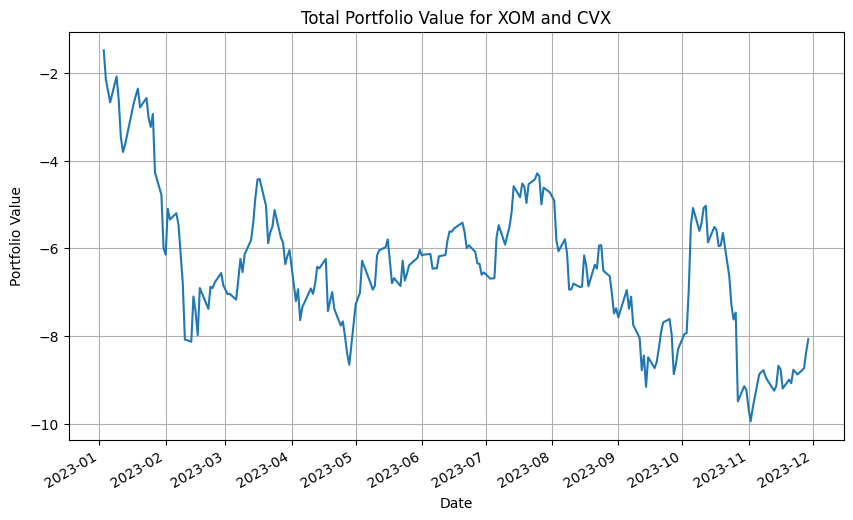

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


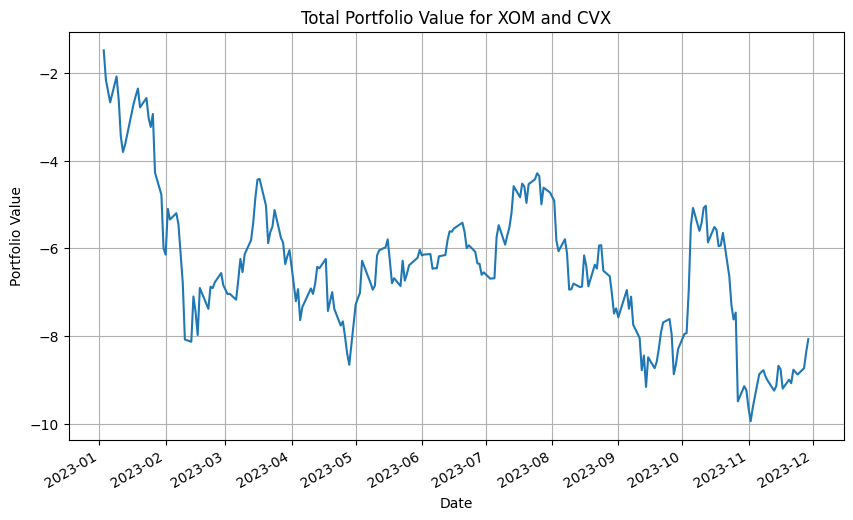

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


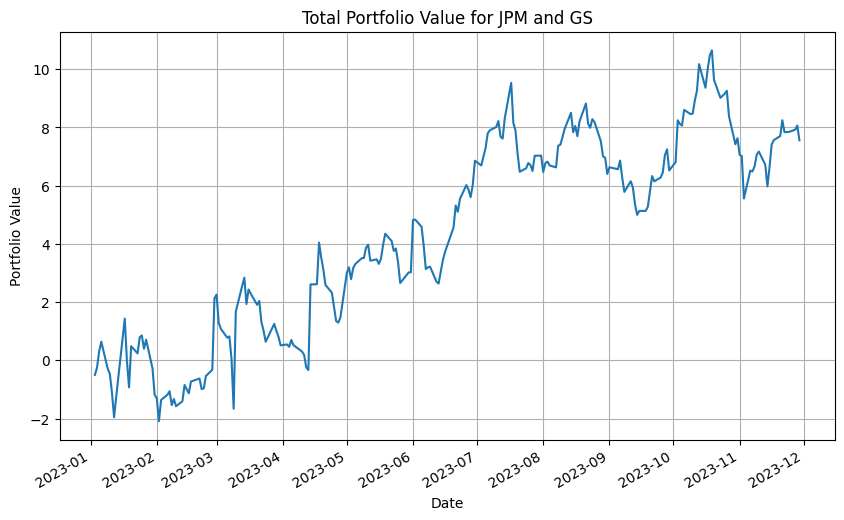

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


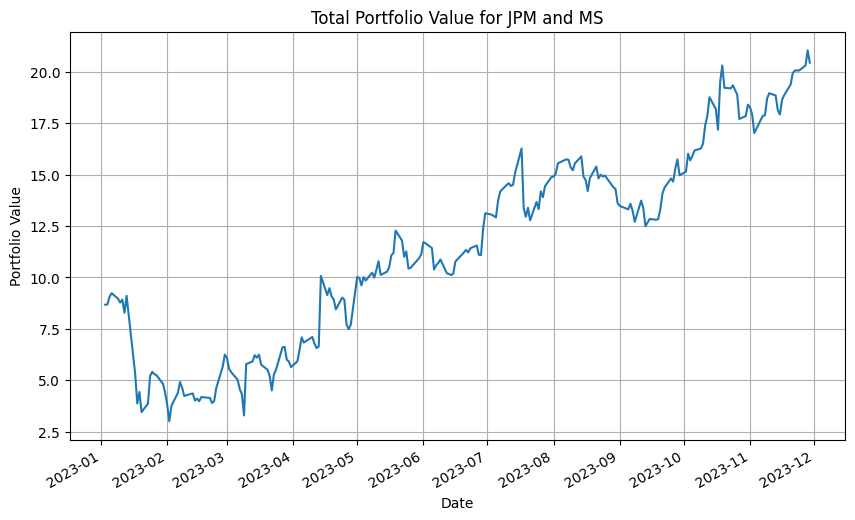

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


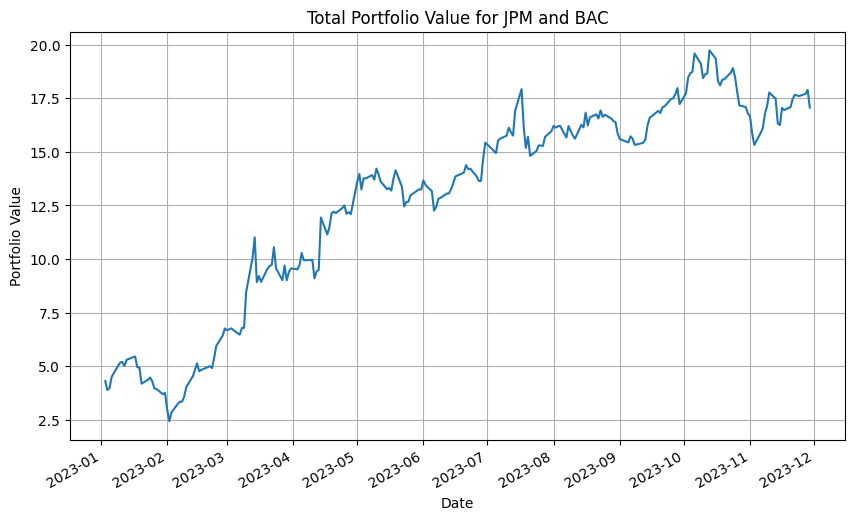

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


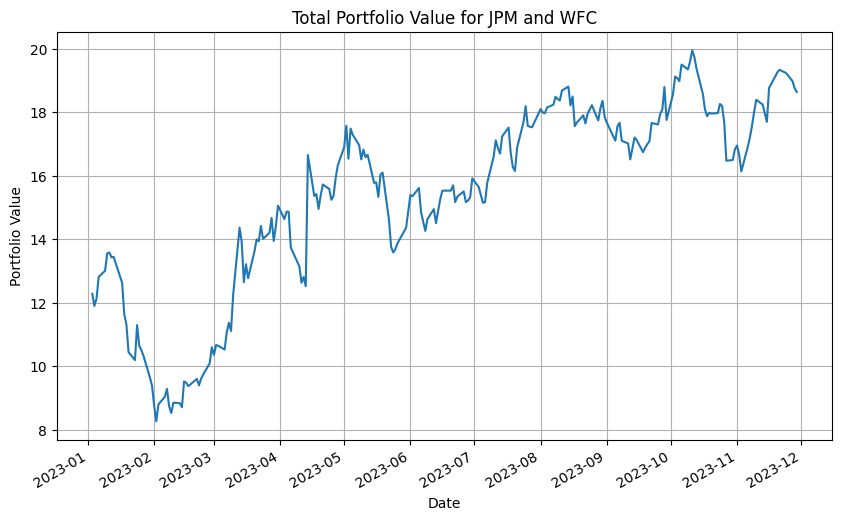

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


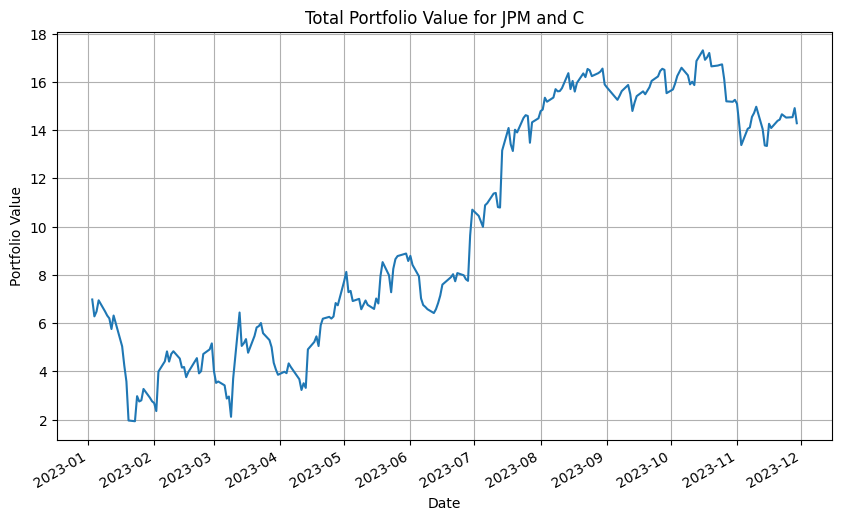

[                       0%%                      ]

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


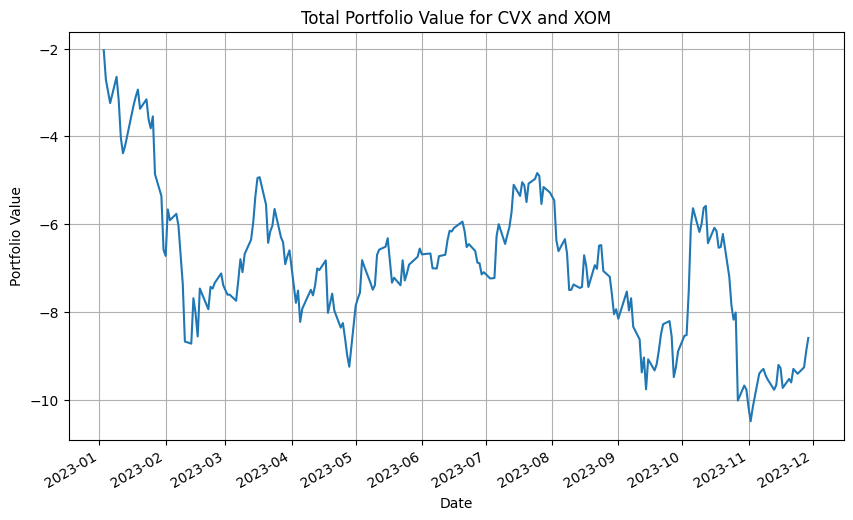

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


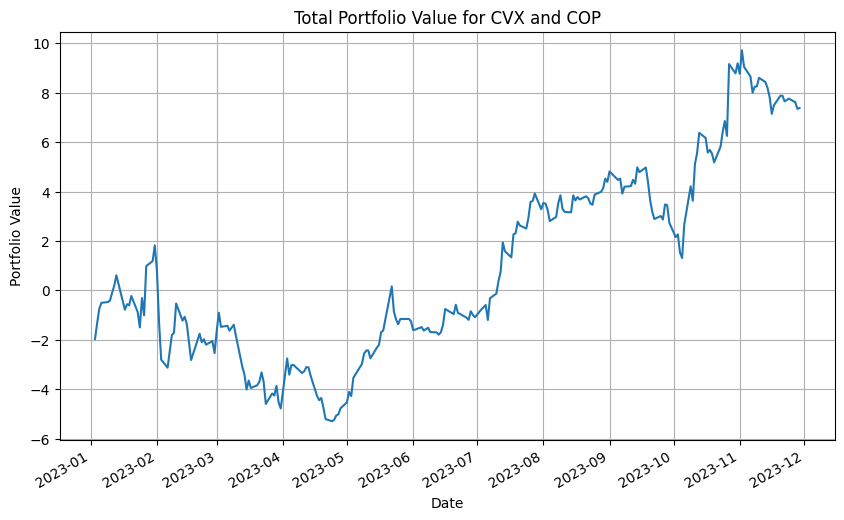

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


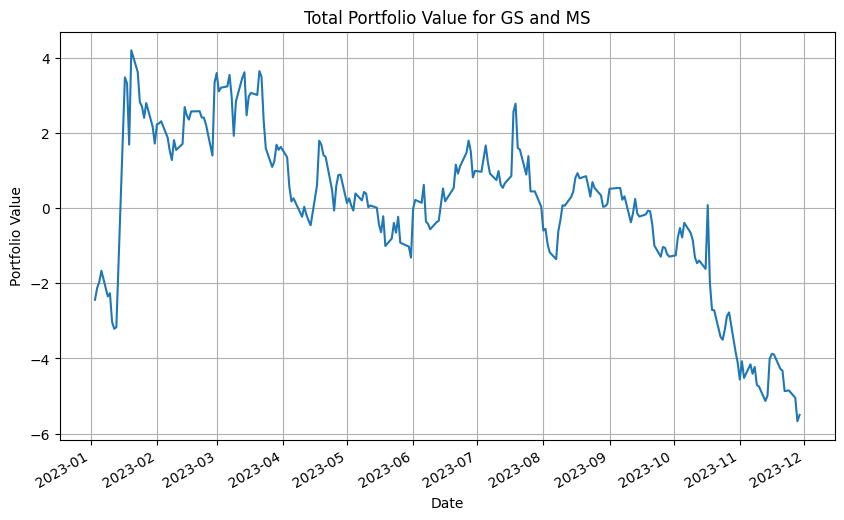

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


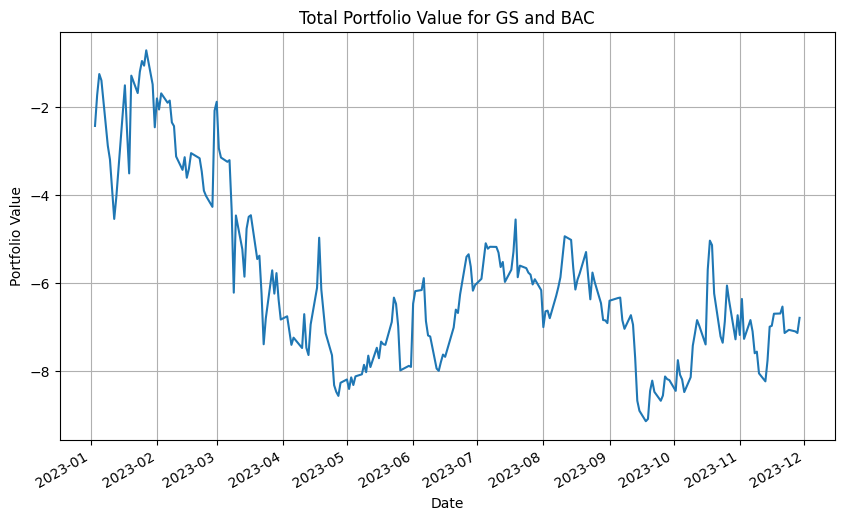

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


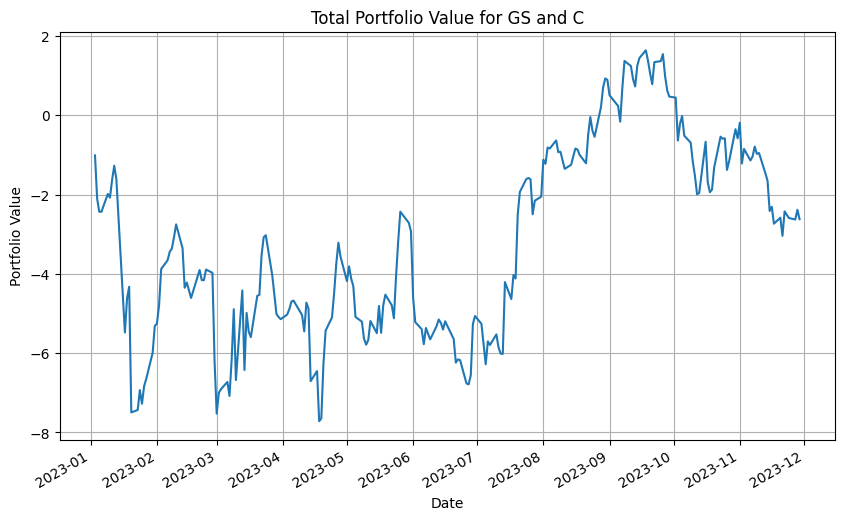

[                       0%%                      ]

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


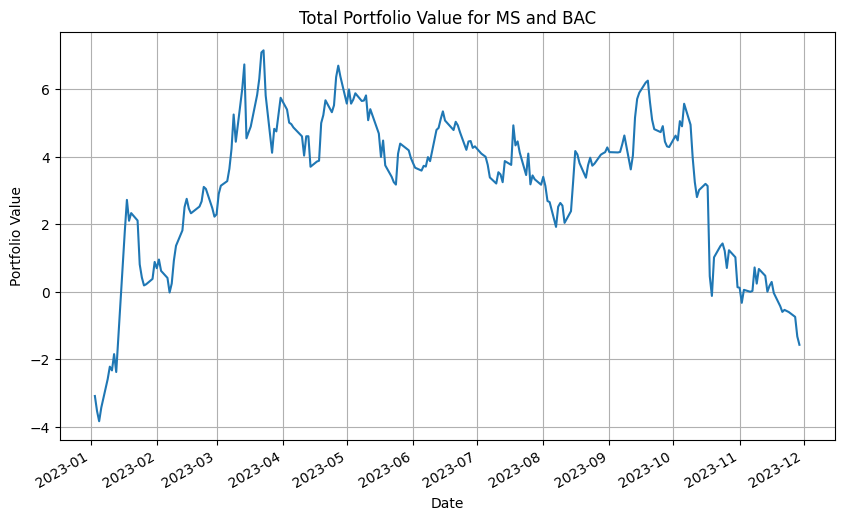

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


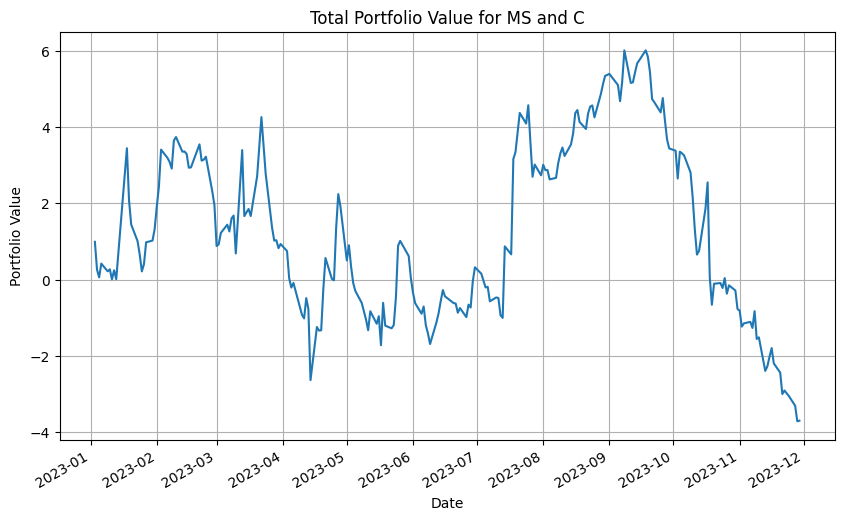

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


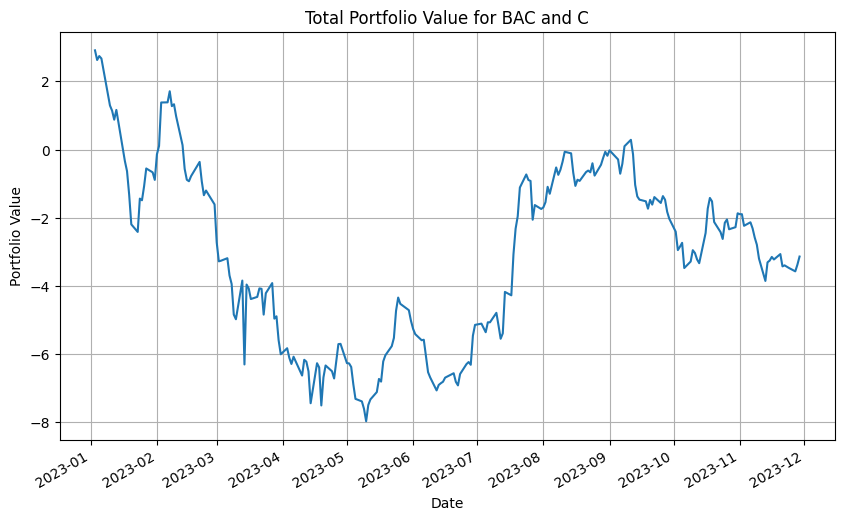

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


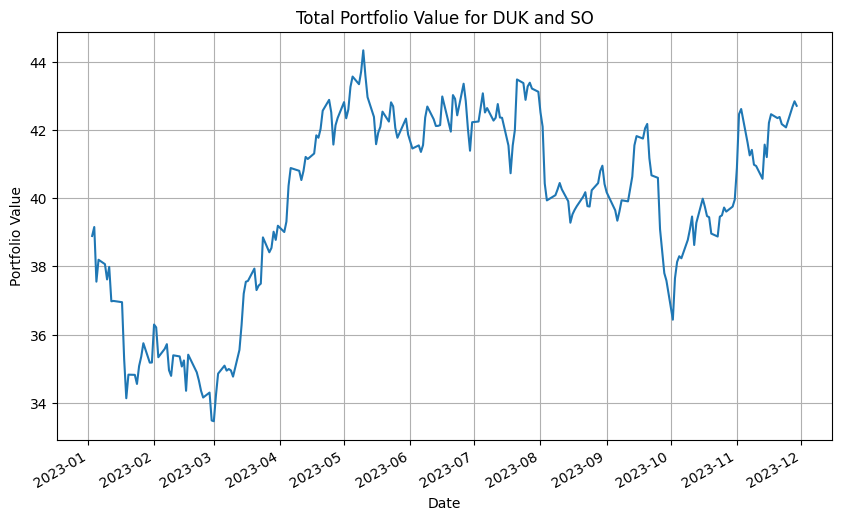

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


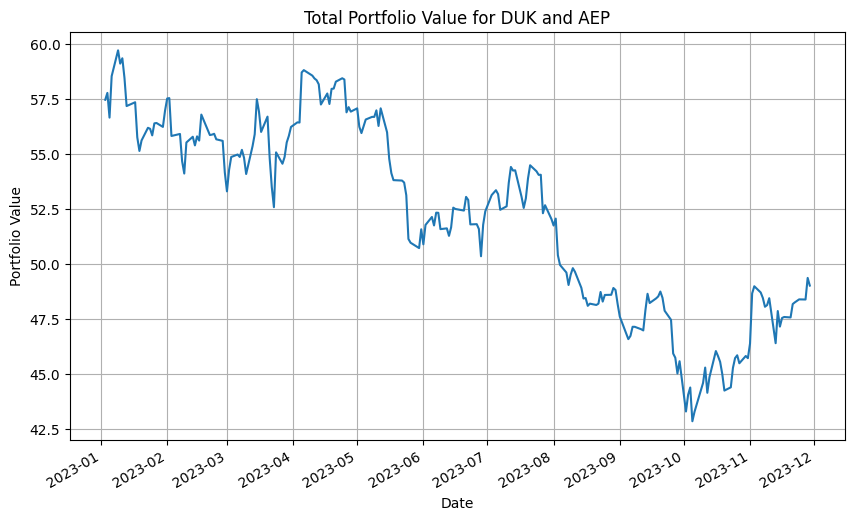

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


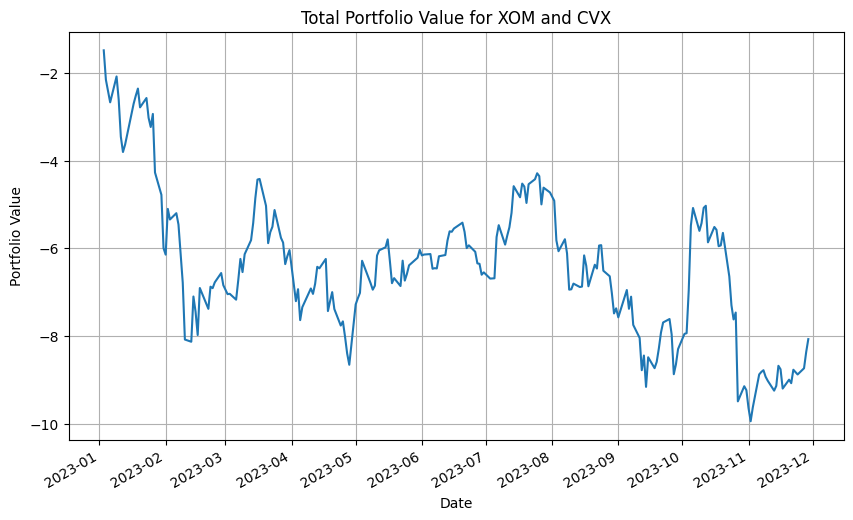

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


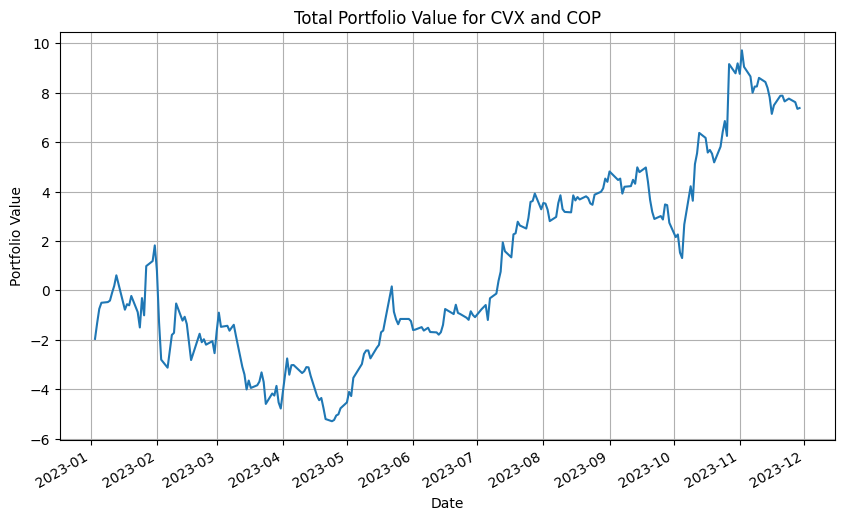

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


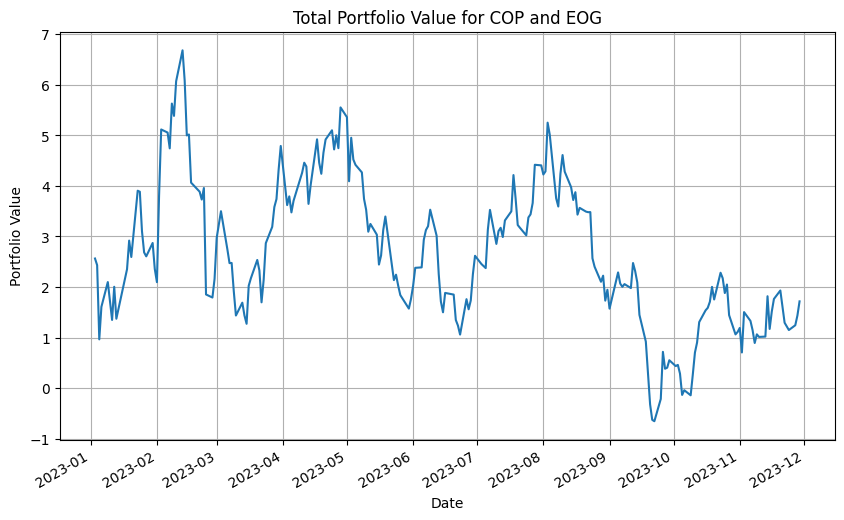

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[*********************100%%**********************]  2 of 2 completed


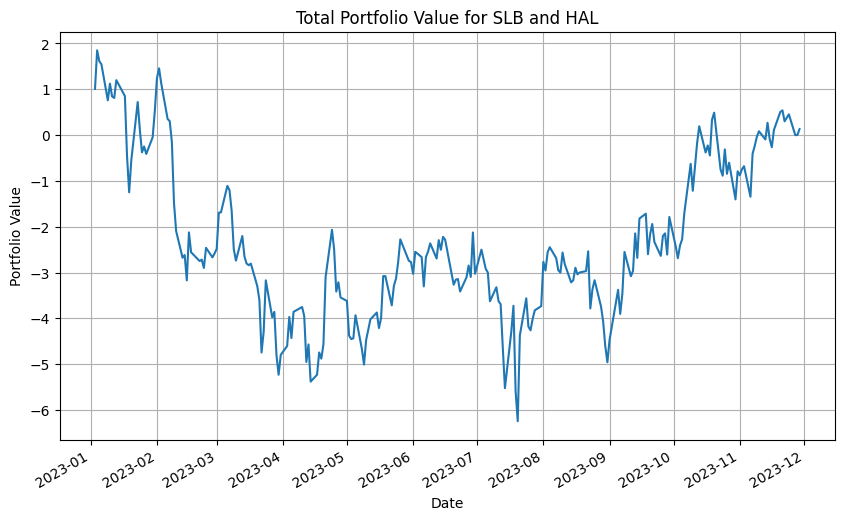

In [19]:
results = []
total_initial_investment = 0
total_final_investment_value = 0

for index, row in All_sets_of_pairs.iterrows():
    pair_result = calculate_optimal_weights_and_returns2(row['Stock1'], row['Stock2'], closing_prices, returns, '2023-01-01', '2023-11-30')
    results.append(pair_result)

    # Sum the initial and final investment values if the result is successful
    if pair_result['status'] == 'success':
        total_initial_investment += pair_result['initial_investment']
        total_final_investment_value += pair_result['final_investment_value']

total_return = ((total_final_investment_value / total_initial_investment) - 1) * 100

In [20]:
print(total_return )

12.030714145258736
